# 1. Pendahuluan

Halo! Selamat datang di portofolio saya.

File ipynb ini merupakan bagian dari portofolio yang dibuat oleh:

**Haidar Farras Latief**

Semoga file ini dapat membantu anda mencari informasi mengenai kemampuan saya.

## 1.1 Deskripsi file ini

File ini (Churn_Analysis_and Prediction_haidar_farras_latief.ipynb) adalah file pengerjaan prediksi churn (Berhentinya pelanggan/customer membeli jasa) dengan dataset ecommerce yang diambil dari Kaggle. Pengerjaan file ini pada awalnya merupakan tugas yang diberikan dari Hacktiv8 untuk menilai apakah saya sudah menguasai teknik Supervised Classification Machine Learning. Sebagai portofolio saya, saya melakukan beberapa perubahan. Tujuan utama dari perubahan ini adalah untuk menyesuaikan dengan kebutuhan portofolio dan memperbaiki pengerjaan yang dikoreksi oleh instruktur maupun yang dianggap oleh saya sendiri perlu diperbaiki.

## 1.2 Data yang dipakai

Saya memakai dataset dari:
``
https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction
``

## 1.3 Tujuan

Saya memprediksi berhentinya customer terhadap pelayanan dari perusahaan e-commerce (Churn) dengan algoritma klasifikasi.

## 1.4 Pernyataan objectives

Membuat algoritma untuk memprediksikan customer memberhentikan pelayanan perusahaan e-commerce dengan dataset penggunaan pelayanan perusahaan e-commerce. Untuk dapat mencegah customer memberhentikan pelayanan perushaan e=commerce.

# 2. Persiapan

## 2.1 Memasukan Pustaka

In [2]:
# 1. Pustaka dasar python
# 1.1 Untuk melakukan manipulasi dataframe
import pandas as pd
# 1.2 Untuk manipulasi array
import numpy as np
# 1.3 Untuk visualisasi data
import matplotlib.pyplot as plt
# 1.4 Untuk membantu visualisasi data yang dilakukan oleh matplotlib.pyplot / plt
import seaborn as sns

# 2. Pustaka Data Pre-Processing
# 2.1 Untuk membuat heatmap
import phik
# 2.2 Untuk melakukan test korealsi
from sklearn.feature_selection import SelectKBest
# 2.3 Untuk melakukan test korelasi chi square
from sklearn.feature_selection import chi2
# 2.4 Untuk memisahkan data train dan data test
from sklearn.model_selection import train_test_split
# 2.5 Untuk melakukan capping
from feature_engine.outliers import Winsorizer
# 2.6 Untuk membuat pipleline
from sklearn.pipeline import Pipeline
# 2.7 Untuk transformasi kolom
from sklearn.compose import ColumnTransformer
# 2.8 Untuk melakukan encoding secara ordinal
from sklearn.preprocessing import OrdinalEncoder
# 2.9 Untuk melakukan scaling dengan metode MinMax
from sklearn.preprocessing import MinMaxScaler
# 2.10 Uuntuk melakukan encoding dengan metode OneHot
from sklearn.preprocessing import OneHotEncoder
# 2.11 Untuk melakukan downsampling
from sklearn.utils import resample
# 2.12 Untuk menangani missing value
from sklearn.impute import SimpleImputer

# 3. Pustaka Model Prediksi
# 3.1 Untuk melakukan modeling dengan algoritma regresi logistik
from sklearn.linear_model import LogisticRegression
# 3.2 Untuk melakukan modeling dengan algoritma Support Vector Machine (SVC)
from sklearn.svm import SVC
# 3.3 Untuk melakukan modeling dengan algoritma Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# 3.4 Untuk melakukan modeling dengan algoritma Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# 3.5 Untuk melakukan modeling dengan algoritma K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
# 3.6 Untuk melakukan modeling dengan algoritma Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
# 3.7 Untuk melakukan modeling dengan algoritma Ada Boost Classifier
from sklearn.ensemble import AdaBoostClassifier
# 2.12 Untuk menghitung waktu kode berjalan
from time import time

# 4. Pustaka evaluasi model
# 4.1 Untuk melakukan evaluasi dari model algoritma
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
# 4.2 Untuk melakukan evaluasi berulang
from sklearn.model_selection import StratifiedKFold
# 4.3 Untuk melakukan penilaian setelah evaluasi
from sklearn.model_selection import cross_val_score
# 4.4 ntuk melakukan Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

## 2.2 Mengunduh dataset

Saya mengunduh dataset ini dari:
``
https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction
``

## 2.3 Menyambungkan dengan file ipynb ini

In [3]:
df = pd.read_csv('Ecommerce Dataset.csv')
df_dict = pd.read_csv('Dataset-dictionary.csv')

## 2.4 Melihat dataset 

### 2.4.1 Data awal dan akhir

In [4]:
df.head(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


In [5]:
df.tail(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,225
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169


### 2.4.2 Melihat tipe data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### 2.4.3 Melihat penjelasan masing-masing kolom

In [7]:
df_dict

,Variable,Discerption
0,CustomerID,Unique customer ID
1,Churn,Churn Flag
2,Tenure,Tenure of customer in organization
3,PreferredLoginDevice,Preferred login device of customer
4,CityTier,City tier
5,WarehouseToHome,Distance in between warehouse to home of customer
6,PreferredPaymentMode,Preferred payment method of customer
7,Gender,Gender of customer
8,HourSpendOnApp,Number of hours spend on mobile application or...
9,NumberOfDeviceRegistered,Total number of deceives is registered on part...


### 2.4.4 Melihat missing value

In [8]:
# kode ini menghitung semua jumlah missing value pada masing-masing kolom dan mengurutkannya hingga yang terbanyak berada pada paling atas
df.isna().sum().sort_values(ascending=False)

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

### 2.4.5 Melihat deskripsi kolom numerikal

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


### 2.4.6 Kesimpulan hasil pengamatan

Terdapat data boolean yang merupakan tipe numerikal, yaitu:
- Churn
- Complain

In [10]:
df['Churn'].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

In [11]:
df['Complain'].value_counts()

0    4026
1    1604
Name: Complain, dtype: int64

Ada juga data boolean yang merupakan tipe object, yaitu hanya:
- Gender

In [12]:
df['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

Lalu untuk data numerikal yang mempunyai unique value lebih dari 2 adalah:
- CustomerID
- Tenure
- CityTier
- WarehouseToHome
- HourSpendOnApp
- NumberOfDeviceRegistered
- SatisfactionScore
- NumberOfAddress
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder
- CashbackAmount

Untuk data object yang mempunyai unique value lebih dari 2 adalah:
- PreferredLoginDevice
- PreferredPaymentMode
- PreferedOrderCat
- MaritalStatus

# 3. Exploratory Data Analysis (EDA)

## 3.1 Melihat keseimbangan data target

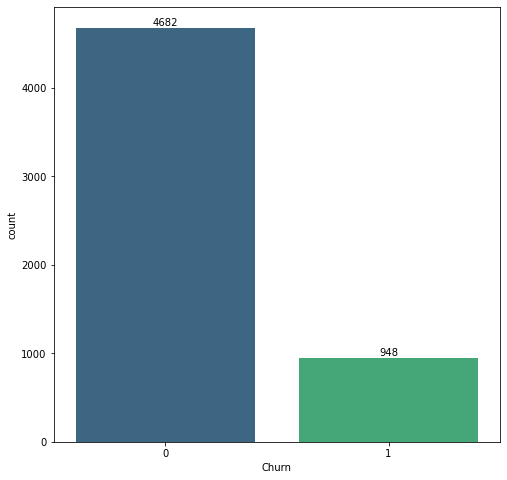

In [13]:
# membuat grafik countplot untuk melihat keseimbangan data target

plt.figure(figsize=(8,8))
c = sns.countplot(data=df, x='Churn', palette='viridis')
c.bar_label(c.containers[0], label_type='edge');

Perhitungan persen untuk data minoritas:
```
( 948 / ( 4682 + 948 ) ) * 100 = 16%
```

Dibanding data mayoritas, data minoritas terlalu kecil untuk dapat dijadikan data train. Sehingga diperlukan penanganan.

## 3.2 Melihat persebaran data numerik

Saya tidak melakukan pengamatan pada data Customer_ID karena ini merupakan data identitas, sehingga yang akan saya amati adalah:
- Tenure
- CityTier
- WarehouseToHome
- HourSpendOnApp
- NumberOfDeviceRegistered
- SatisfactionScore
- NumberOfAddress
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder
- CashbackAmount

### 3.2.1 Definisikan fungsi visualisasi, diagnostic_histplots

In [14]:
# fungsi untuk menampilkan histogram dan boxplot

def diagnostic_histplots(data, feature):
    plt.figure(figsize=(16,4))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature])
    plt.title('Histogram')

    plt.show()

### 3.2.2 Pengamatan persebaran data numerik

#### 3.2.2.1 Tenure

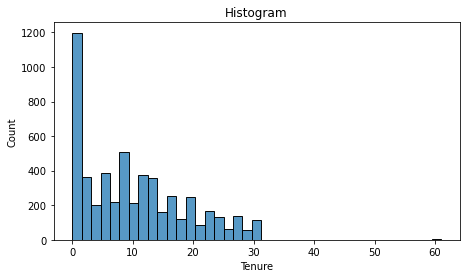


Nama variabel: Tenure

Nilai Skewness:  0.7365133838993447


In [15]:
# histogram dan boxplot kolom Tenure

diagnostic_histplots(df, 'Tenure')
print('\nNama variabel: Tenure')
print('\nNilai Skewness: ', df['Tenure'].skew())

#### 3.2.2.2 CityTier

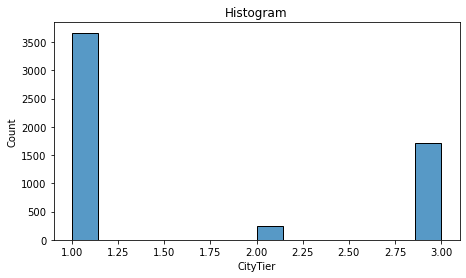


Nama variabel: CityTier

Nilai Skewness:  0.7353259435532102


In [16]:
# histogram dan boxplot kolom CityTier

diagnostic_histplots(df, 'CityTier')
print('\nNama variabel: CityTier')
print('\nNilai Skewness: ', df['CityTier'].skew())

#### 3.2.2.3 WarehouseToHome

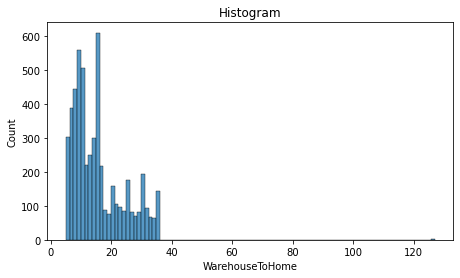


Nama variabel: WarehouseToHome

Nilai Skewness:  1.619153668208649


In [17]:
# histogram dan boxplot kolom WarehouseToHome

diagnostic_histplots(df, 'WarehouseToHome')
print('\nNama variabel: WarehouseToHome')
print('\nNilai Skewness: ', df['WarehouseToHome'].skew())

#### 3.2.2.4 HourSpendOnApp

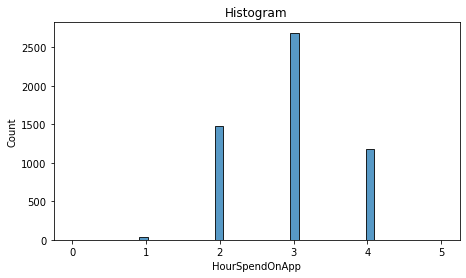


Nama variabel: HourSpendOnApp

Nilai Skewness:  -0.0272126216339304


In [18]:
# histogram dan boxplot kolom HourSpendOnApp

diagnostic_histplots(df, 'HourSpendOnApp')
print('\nNama variabel: HourSpendOnApp')
print('\nNilai Skewness: ', df['HourSpendOnApp'].skew())

#### 3.2.2.5 NumberOfDeviceRegistered

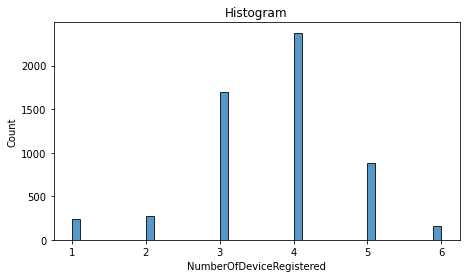


Nama variabel: NumberOfDeviceRegistered

Nilai Skewness:  -0.3969686434933112


In [19]:
# histogram dan boxplot kolom NumberOfDeviceRegistered

diagnostic_histplots(df, 'NumberOfDeviceRegistered')
print('\nNama variabel: NumberOfDeviceRegistered')
print('\nNilai Skewness: ', df['NumberOfDeviceRegistered'].skew())

#### 3.2.2.6 SatisfactionScore

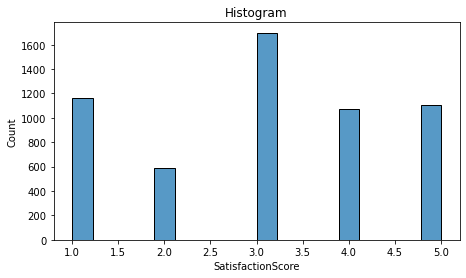


Nama variabel: SatisfactionScore

Nilai Skewness:  -0.1426257223091171


In [20]:
# histogram dan boxplot kolom SatisfactionScore

diagnostic_histplots(df, 'SatisfactionScore')
print('\nNama variabel: SatisfactionScore')
print('\nNilai Skewness: ', df['SatisfactionScore'].skew())

#### 3.2.2.7 NumberOfAddress

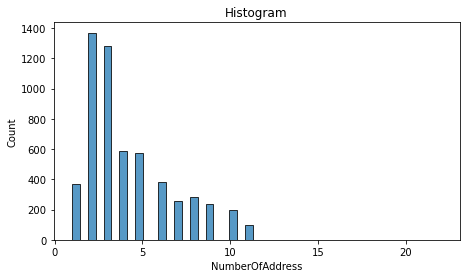


Nama variabel: NumberOfAddress

Nilai Skewness:  1.0886393829995942


In [21]:
# histogram dan boxplot kolom NumberOfAddress

diagnostic_histplots(df, 'NumberOfAddress')
print('\nNama variabel: NumberOfAddress')
print('\nNilai Skewness: ', df['NumberOfAddress'].skew())

#### 3.2.2.8 OrderAmountHikeFromlastYear

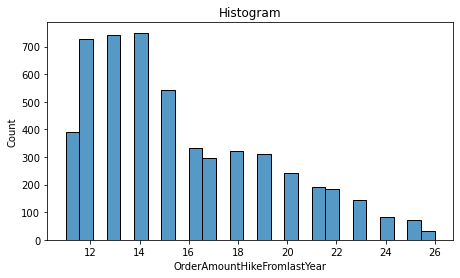


Nama variabel: OrderAmountHikeFromlastYear

Nilai Skewness:  0.7907853590510951


In [22]:
# histogram dan boxplot kolom OrderAmountHikeFromlastYear

diagnostic_histplots(df, 'OrderAmountHikeFromlastYear')
print('\nNama variabel: OrderAmountHikeFromlastYear')
print('\nNilai Skewness: ', df['OrderAmountHikeFromlastYear'].skew())

#### 3.2.2.9 CouponUsed

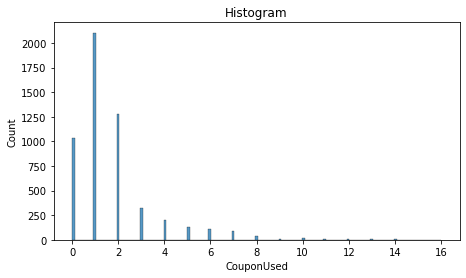


Nama variabel: CouponUsed

Nilai Skewness:  2.545652562076972


In [23]:
# histogram dan boxplot kolom CouponUsed

diagnostic_histplots(df, 'CouponUsed')
print('\nNama variabel: CouponUsed')
print('\nNilai Skewness: ', df['CouponUsed'].skew())

#### 3.2.2.10 OrderCount

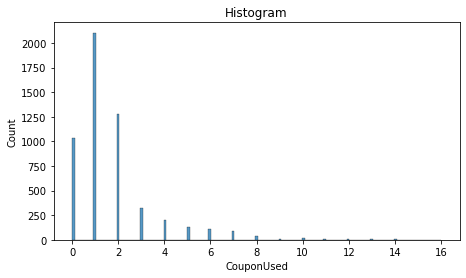


Nama variabel: CouponUsed

Nilai Skewness:  2.545652562076972


In [24]:
# histogram dan boxplot kolom CouponUsed

diagnostic_histplots(df, 'CouponUsed')
print('\nNama variabel: CouponUsed')
print('\nNilai Skewness: ', df['CouponUsed'].skew())

#### 3.2.2.11 OrderCount

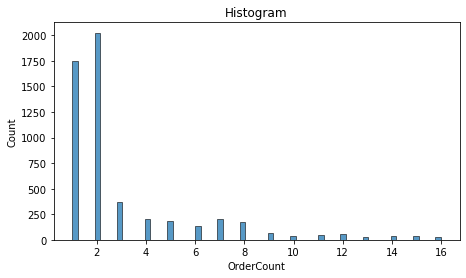


Nama variabel: OrderCount

Nilai Skewness:  2.196414108096659


In [25]:
# histogram dan boxplot kolom OrderCount

diagnostic_histplots(df, 'OrderCount')
print('\nNama variabel: OrderCount')
print('\nNilai Skewness: ', df['OrderCount'].skew())

#### 3.2.2.12 DaySinceLastOrder

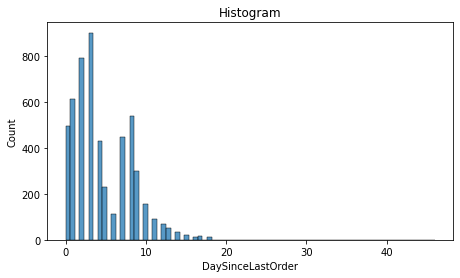


Nama variabel: DaySinceLastOrder

Nilai Skewness:  1.1909995034566865


In [26]:
# histogram dan boxplot kolom DaySinceLastOrder

diagnostic_histplots(df, 'DaySinceLastOrder')
print('\nNama variabel: DaySinceLastOrder')
print('\nNilai Skewness: ', df['DaySinceLastOrder'].skew())

#### 3.2.2.13 CashbackAmount

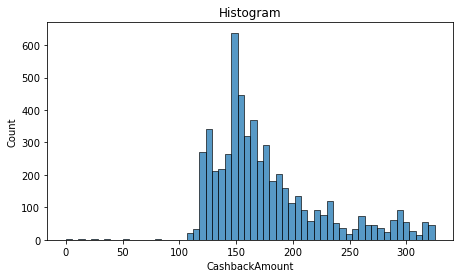


Nama variabel: CashbackAmount

Nilai Skewness:  1.149621570493077


In [27]:
# histogram dan boxplot kolom CashbackAmount

diagnostic_histplots(df, 'CashbackAmount')
print('\nNama variabel: CashbackAmount')
print('\nNilai Skewness: ', df['CashbackAmount'].skew())

## 3.3 Melihat isi data yang mempunyai missing value pada masing-masing kolom

Dari pengamatan saya pada bagian 2.4.4 , terdapat missing value yang berada pada:

In [28]:
# kode ini menghitung semua jumlah missing value pada masing-masing kolom dan mengurutkannya hingga yang terbanyak berada pada paling atas
df.isna().sum().sort_values(ascending=False)

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### 3.3.1 DaySinceLastOrder

In [30]:
df_1_nan = df[df['DaySinceLastOrder'].isna()]
df_1_nan.head(30)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
88,50089,0,24.0,Mobile Phone,1,14.0,Debit Card,Male,2.0,4,Fashion,4,Divorced,6,0,16.0,1.0,4.0,NaN,225
97,50098,0,10.0,Computer,1,17.0,UPI,Male,2.0,3,Fashion,2,Married,2,1,14.0,0.0,1.0,NaN,222
126,50127,0,12.0,Computer,1,8.0,Cash on Delivery,Female,3.0,3,Fashion,3,Single,1,0,25.0,10.0,11.0,NaN,209
146,50147,1,10.0,Computer,1,35.0,Debit Card,Male,2.0,3,Fashion,4,Divorced,2,1,12.0,5.0,9.0,NaN,218
151,50152,0,2.0,Mobile Phone,1,28.0,Debit Card,Female,3.0,2,Fashion,4,Married,8,0,18.0,5.0,6.0,NaN,220
182,50183,0,11.0,Mobile Phone,1,31.0,Debit Card,Female,2.0,4,Fashion,4,Divorced,4,0,17.0,1.0,1.0,NaN,221
188,50189,0,6.0,Computer,1,11.0,Debit Card,Female,3.0,3,Fashion,4,Divorced,7,0,11.0,2.0,8.0,NaN,219
216,50217,0,11.0,Mobile Phone,1,21.0,Debit Card,Male,3.0,4,Fashion,2,Married,1,1,14.0,1.0,2.0,NaN,215
227,50228,0,21.0,Mobile Phone,3,35.0,Credit Card,Female,3.0,3,Fashion,3,Divorced,4,0,21.0,0.0,1.0,NaN,225
295,50296,0,2.0,Mobile Phone,1,9.0,Credit Card,Male,3.0,4,Fashion,3,Divorced,2,0,18.0,1.0,1.0,NaN,219


### 3.3.2 OrderAmountHikeFromlastYear

In [31]:
df_2_nan = df[df['OrderAmountHikeFromlastYear'].isna()]
df_2_nan.head(30)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
10,50011,1,4.0,Mobile Phone,1,18.0,Cash on Delivery,Female,2.0,3,Others,3,Divorced,2,0,NaN,9.0,15.0,8.0,295
40,50041,0,23.0,Mobile Phone,1,17.0,Debit Card,Female,2.0,3,Others,4,Single,4,0,NaN,2.0,4.0,4.0,299
65,50066,0,25.0,Mobile Phone,1,6.0,Debit Card,Male,3.0,4,Others,3,Divorced,1,0,NaN,1.0,11.0,9.0,300
106,50107,0,15.0,Mobile Phone,1,10.0,Cash on Delivery,Male,2.0,3,Others,2,Divorced,2,0,NaN,0.0,11.0,15.0,292
108,50109,0,23.0,Mobile Phone,3,6.0,Credit Card,Female,3.0,3,Others,2,Married,4,0,NaN,1.0,1.0,6.0,295
119,50120,0,18.0,Mobile Phone,1,6.0,UPI,Male,3.0,2,Others,2,Divorced,1,0,NaN,1.0,1.0,7.0,292
132,50133,0,13.0,Mobile Phone,1,8.0,Credit Card,Male,2.0,3,Others,3,Married,1,0,NaN,0.0,3.0,9.0,294
201,50202,0,12.0,Computer,1,5.0,Credit Card,Male,2.0,4,Others,2,Divorced,2,0,NaN,9.0,13.0,3.0,293
267,50268,0,27.0,Mobile Phone,1,11.0,Credit Card,Male,2.0,3,Others,5,Divorced,5,0,NaN,1.0,1.0,2.0,294
286,50287,0,30.0,Mobile Phone,1,13.0,Debit Card,Female,2.0,3,Others,5,Divorced,6,0,NaN,0.0,11.0,10.0,296


### 3.3.3 Tenure

In [32]:
df_3_nan = df[df['Tenure'].isna()]
df_3_nan.head(30)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
6,50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,121
7,50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,123
9,50010,1,NaN,Phone,1,31.0,Debit Card,Male,2.0,5,Mobile,3,Single,2,0,12.0,1.0,1.0,1.0,123
15,50016,1,NaN,Phone,2,12.0,UPI,Male,3.0,3,Mobile,5,Married,5,1,22.0,1.0,1.0,2.0,121
22,50023,1,NaN,Mobile Phone,3,28.0,E wallet,Male,2.0,3,Mobile Phone,3,Single,2,1,19.0,0.0,1.0,0.0,117
27,50028,0,NaN,Phone,3,12.0,E wallet,Male,2.0,3,Laptop & Accessory,3,Divorced,3,1,20.0,0.0,4.0,5.0,123
34,50035,0,NaN,Computer,3,8.0,E wallet,Female,3.0,3,Mobile,3,Divorced,7,0,18.0,1.0,1.0,2.0,122
36,50037,0,NaN,Computer,1,15.0,CC,Male,2.0,3,Mobile,4,Married,7,0,18.0,0.0,2.0,2.0,120


### 3.3.4 OrderCount

In [33]:
df_4_nan = df[df['OrderCount'].isna()]
df_4_nan.head(30)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
64,50065,0,24.0,Mobile Phone,1,9.0,Credit Card,Female,3.0,3,Grocery,4,Single,4,0,18.0,0.0,NaN,0.0,237
90,50091,0,14.0,Mobile Phone,3,12.0,Debit Card,Female,3.0,3,Fashion,2,Single,4,1,18.0,0.0,NaN,0.0,236
110,50111,0,16.0,Mobile Phone,3,22.0,E wallet,Female,3.0,3,Grocery,2,Divorced,6,1,22.0,0.0,NaN,9.0,261
120,50121,0,4.0,Computer,1,9.0,Credit Card,Male,3.0,3,Fashion,3,Married,10,0,12.0,1.0,NaN,2.0,237
143,50144,0,18.0,Mobile Phone,1,26.0,Credit Card,Male,3.0,3,Grocery,2,Divorced,1,1,14.0,0.0,NaN,10.0,235
150,50151,0,10.0,Computer,1,6.0,Credit Card,Female,0.0,3,Fashion,2,Married,3,1,18.0,0.0,NaN,2.0,236
170,50171,0,15.0,Computer,3,32.0,E wallet,Female,3.0,3,Grocery,4,Divorced,6,0,14.0,2.0,NaN,8.0,235
175,50176,0,14.0,Mobile Phone,3,8.0,Debit Card,Male,2.0,3,Grocery,4,Single,2,0,19.0,1.0,NaN,4.0,260
191,50192,0,22.0,Mobile Phone,1,6.0,Cash on Delivery,Female,2.0,4,Grocery,3,Single,8,1,12.0,1.0,NaN,7.0,240
223,50224,0,15.0,Mobile Phone,1,29.0,Debit Card,Female,2.0,3,Grocery,2,Single,3,0,14.0,0.0,NaN,0.0,260


### 3.3.5 CouponUsed

In [34]:
df_5_nan = df[df['CouponUsed'].isna()]
df_5_nan.head(30)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
61,50062,0,13.0,Mobile Phone,1,10.0,Credit Card,Female,2.0,3,Others,3,Divorced,2,0,14.0,NaN,9.0,9.0,290
62,50063,0,28.0,Mobile Phone,1,20.0,Credit Card,Male,3.0,2,Others,4,Single,9,0,11.0,NaN,2.0,15.0,287
69,50070,0,18.0,Computer,1,8.0,Credit Card,Male,3.0,4,Grocery,2,Divorced,10,0,23.0,NaN,11.0,8.0,268
112,50113,0,25.0,Computer,3,8.0,Debit Card,Male,3.0,4,Others,3,Single,2,1,18.0,NaN,15.0,12.0,291
138,50139,0,19.0,Mobile Phone,3,8.0,Cash on Delivery,Female,3.0,5,Grocery,4,Divorced,4,1,12.0,NaN,7.0,7.0,269
145,50146,0,28.0,Mobile Phone,1,6.0,Credit Card,Male,2.0,3,Others,5,Single,1,1,14.0,NaN,4.0,13.0,290
154,50155,0,23.0,Mobile Phone,1,10.0,Debit Card,Male,3.0,3,Others,4,Married,4,0,14.0,NaN,1.0,6.0,291
155,50156,0,26.0,Mobile Phone,1,9.0,Credit Card,Male,2.0,3,Grocery,3,Divorced,4,1,16.0,NaN,1.0,3.0,276
165,50166,0,22.0,Computer,1,16.0,Debit Card,Female,2.0,3,Others,5,Single,10,1,11.0,NaN,1.0,2.0,287
189,50190,0,12.0,Mobile Phone,1,16.0,Credit Card,Male,2.0,3,Grocery,5,Divorced,2,1,14.0,NaN,11.0,10.0,271


### 3.3.6 HourSpendOnApp

In [35]:
df_6_nan = df[df['HourSpendOnApp'].isna()]
df_6_nan.head(30)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
8,50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,127
16,50017,1,0.0,Computer,1,12.0,Debit Card,Female,NaN,4,Mobile,2,Single,2,1,18.0,1.0,1.0,0.0,129
37,50038,0,1.0,Phone,1,27.0,CC,Male,NaN,3,Mobile,2,Divorced,2,0,11.0,0.0,1.0,2.0,127
44,50045,0,5.0,Phone,1,12.0,Debit Card,Male,NaN,3,Mobile,3,Single,4,0,20.0,0.0,1.0,4.0,130
45,50046,0,0.0,Phone,1,23.0,COD,Male,NaN,3,Mobile,4,Divorced,1,1,16.0,1.0,1.0,1.0,131
48,50049,0,3.0,Computer,1,15.0,CC,Male,NaN,3,Laptop & Accessory,5,Married,2,0,11.0,0.0,6.0,10.0,131
57,50058,1,4.0,Phone,3,26.0,E wallet,Female,NaN,3,Mobile,4,Single,2,1,22.0,0.0,1.0,2.0,131
60,50061,0,6.0,Phone,1,20.0,CC,Female,NaN,3,Mobile,4,Divorced,2,0,13.0,0.0,1.0,6.0,128
78,50079,0,13.0,Phone,1,25.0,CC,Male,NaN,3,Laptop & Accessory,2,Divorced,9,1,15.0,1.0,3.0,7.0,127


### 3.3.7 WarehouseToHome

In [36]:
df_7_nan = df[df['WarehouseToHome'].isna()]
df_7_nan.head(30)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
28,50029,0,18.0,Phone,1,NaN,Debit Card,Male,2.0,3,Laptop & Accessory,4,Married,9,0,18.0,1.0,1.0,15.0,123
35,50036,0,0.0,Phone,1,NaN,CC,Male,3.0,3,Mobile,2,Divorced,2,0,24.0,0.0,2.0,2.0,123
39,50040,0,0.0,Computer,1,NaN,CC,Male,3.0,4,Mobile,3,Married,2,1,15.0,0.0,1.0,1.0,126
41,50042,0,14.0,Phone,1,NaN,Debit Card,Male,2.0,3,Mobile,3,Married,5,0,12.0,1.0,1.0,8.0,125
46,50047,1,0.0,Computer,3,NaN,COD,Female,3.0,5,Mobile,5,Single,1,0,21.0,1.0,1.0,0.0,123
51,50052,0,6.0,Phone,1,NaN,Debit Card,Male,2.0,3,Mobile,2,Single,1,0,14.0,0.0,1.0,2.0,125
81,50082,0,0.0,Phone,1,NaN,Debit Card,Male,2.0,2,Mobile,4,Married,2,1,16.0,0.0,2.0,2.0,123
89,50090,1,0.0,Phone,1,NaN,COD,Female,2.0,3,Mobile,5,Single,6,1,11.0,1.0,1.0,4.0,127
96,50097,0,6.0,Phone,1,NaN,CC,Female,2.0,4,Mobile,4,Divorced,7,0,21.0,0.0,1.0,1.0,126
104,50105,1,0.0,Phone,1,NaN,CC,Male,2.0,4,Mobile,2,Single,2,1,13.0,0.0,1.0,1.0,124


### 3.3.8 Kesimpulan mengenai data missing value

Dari pengamatan ini dapat dilihat bahwa tidak ada keseragaman data lainnya pada missing value di masing-masing kolom kecuali tipe data yang hampir sama yaitu numerik. Pada proses selanjutnya, data missing values akan diubah sesuai dengan rata-rata pada kolom tersebut.

# 4. Data Preprocessing

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## 4.1 Drop kolom yang tidak dibutuhkan

In [38]:
df['CustomerID'].value_counts().sort_values(ascending=False)

50001    1
50011    1
50004    1
50005    1
50006    1
        ..
55626    1
55627    1
55628    1
55629    1
55630    1
Name: CustomerID, Length: 5630, dtype: int64

In [39]:
df.drop(columns='CustomerID', inplace=True)

## 4.2 Handling Missing Value

In [40]:
df.isna().sum().sort_values(ascending=False)

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
Churn                            0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

In [41]:
df.loc[(df['DaySinceLastOrder'].isnull()==True),'DaySinceLastOrder']=df['DaySinceLastOrder'].median()
df.loc[(df['OrderAmountHikeFromlastYear'].isnull()==True),'OrderAmountHikeFromlastYear']=df['OrderAmountHikeFromlastYear'].median()
df.loc[(df['Tenure'].isnull()==True),'Tenure']=df['Tenure'].median()
df.loc[(df['OrderCount'].isnull()==True),'OrderCount']=df['OrderCount'].median()
df.loc[(df['CouponUsed'].isnull()==True),'CouponUsed']=df['CouponUsed'].median()
df.loc[(df['HourSpendOnApp'].isnull()==True),'HourSpendOnApp']=df['HourSpendOnApp'].median()
df.loc[(df['WarehouseToHome'].isnull()==True),'WarehouseToHome']=df['WarehouseToHome'].median()

In [42]:
df.isna().sum().sort_values(ascending=False)

Churn                          0
SatisfactionScore              0
DaySinceLastOrder              0
OrderCount                     0
CouponUsed                     0
OrderAmountHikeFromlastYear    0
Complain                       0
NumberOfAddress                0
MaritalStatus                  0
PreferedOrderCat               0
Tenure                         0
NumberOfDeviceRegistered       0
HourSpendOnApp                 0
Gender                         0
PreferredPaymentMode           0
WarehouseToHome                0
CityTier                       0
PreferredLoginDevice           0
CashbackAmount                 0
dtype: int64

## 4.3 Pemisahaan Data Inferensial

In [43]:
# Pemisahan data inference

df_inf = df.sample(20, random_state=114)
df_inf.head(3)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3199,0,7.0,Computer,1,13.0,Debit Card,Male,2.0,4,Laptop & Accessory,2,Married,5,0,24.0,5.0,5.0,8.0,202
189,0,12.0,Mobile Phone,1,16.0,Credit Card,Male,2.0,3,Grocery,5,Divorced,2,1,14.0,1.0,11.0,10.0,271
3905,0,9.0,Computer,1,9.0,Credit Card,Male,4.0,5,Mobile Phone,1,Single,2,1,15.0,2.0,2.0,5.0,174


In [44]:
# memisahkan data inference dari dataset

df_train_test = df.drop(df_inf.index)
df_train_test

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [45]:
# reset index untuk data train-test dan data inference

df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)

## 4.4 Pemisahan Data Latih/Tran dan Data Ujian Test

In [46]:
# mendefinisikan feature dan target

X = df_train_test.drop(columns='Churn', axis=1)
y = df_train_test['Churn']
X

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5605,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5606,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5607,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5608,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [47]:
# memisahkan data train dengan test

train, test = train_test_split(df_train_test, test_size=0.2, stratify=y, random_state=114)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (4488, 19)
Test size:  (1122, 19)


## 4.1 Handling Outlier

### 4.1.1 Definisi Fungsi

#### 4.1.1.1 diagnostic_plots

In [48]:
# fungsi untuk menampilkan histogram dan boxplot

def diagnostic_plots(data, feature):
    plt.figure(figsize=(16,4))

    plt.subplot(1, 2, 1)
    sns.histplot(data[feature])
    plt.title('Histogram')

    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[feature])
    plt.title('Boxplot')

    plt.show()

#### 4.1.1.2 find_skewed_boundaries

In [49]:
# untuk menampilkan garis bawah dan atas pada data ini
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

- Tenure
- CityTier
- WarehouseToHome
- HourSpendOnApp
- NumberOfDeviceRegistered
- SatisfactionScore
- NumberOfAddress
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder
- CashbackAmount

### 4.1.2 Pengerjaan Handling Outlier

#### 4.1.2.1 Pengamatan Outlier

##### 4.1.2.1.1 Tenure

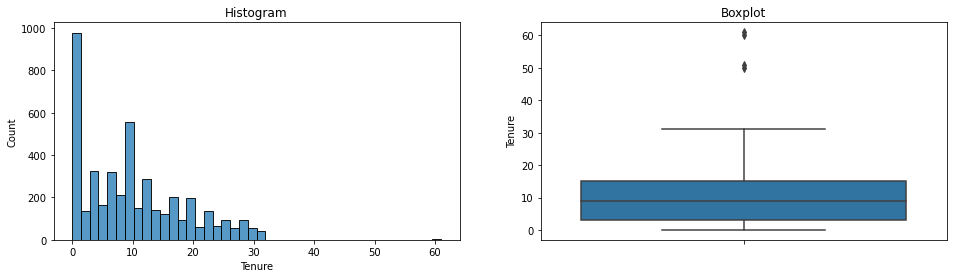


Nama variabel: Tenure

Nilai Skewness:  0.8009948237464355
Batas atas Tenure: 51.0
Batas bawah Tenure: -33.0

Outliers atas Tenure : 2
Outliers bawah Tenure : 0


In [50]:
diagnostic_plots(train, 'Tenure')
print('\nNama variabel: Tenure')
print('\nNilai Skewness: ', train['Tenure'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'Tenure', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas Tenure:',skew_upper_bound)
print('Batas bawah Tenure:',skew_lower_bound)
print('')
print('Outliers atas Tenure : {}'.format(len(train[train['Tenure'] > skew_upper_bound])))
print('Outliers bawah Tenure : {}'.format(len(train[train['Tenure'] < skew_lower_bound])))

##### 4.1.2.1.2 CityTier

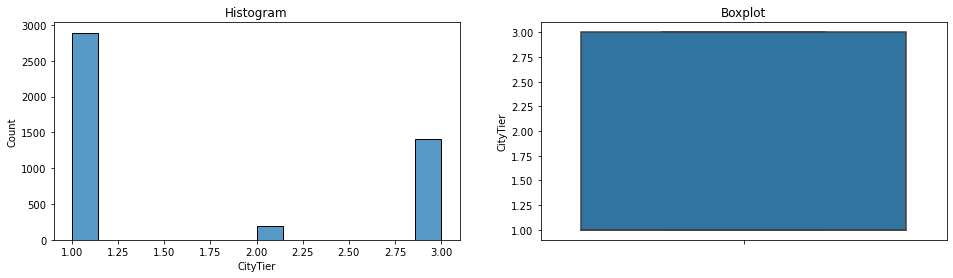


Nama variabel: CityTier

Nilai Skewness:  0.7029539002303368
Batas atas CityTier: 9.0
Batas bawah CityTier: -5.0

Outliers atas CityTier : 0
Outliers bawah CityTier : 0


In [51]:
diagnostic_plots(train, 'CityTier')
print('\nNama variabel: CityTier')
print('\nNilai Skewness: ', train['CityTier'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'CityTier', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas CityTier:',skew_upper_bound)
print('Batas bawah CityTier:',skew_lower_bound)
print('')
print('Outliers atas CityTier : {}'.format(len(train[train['CityTier'] > skew_upper_bound])))
print('Outliers bawah CityTier : {}'.format(len(train[train['CityTier'] < skew_lower_bound])))

##### 4.1.2.1.3 WarehouseToHome

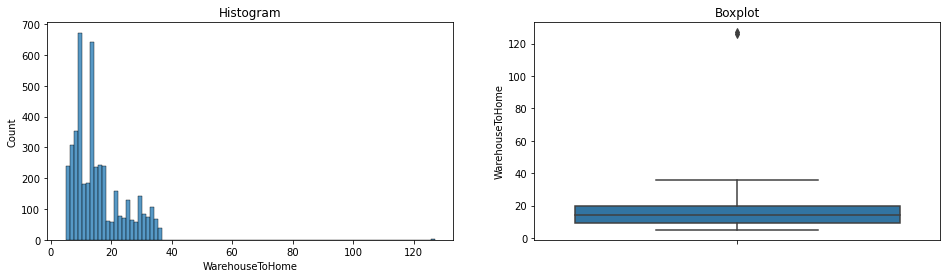


Nama variabel: WarehouseToHome

Nilai Skewness:  1.8558747244350484
Batas atas WarehouseToHome: 53.0
Batas bawah WarehouseToHome: -24.0

Outliers atas WarehouseToHome : 2
Outliers bawah WarehouseToHome : 0


In [52]:
diagnostic_plots(train, 'WarehouseToHome')
print('\nNama variabel: WarehouseToHome')
print('\nNilai Skewness: ', train['WarehouseToHome'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'WarehouseToHome', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas WarehouseToHome:',skew_upper_bound)
print('Batas bawah WarehouseToHome:',skew_lower_bound)
print('')
print('Outliers atas WarehouseToHome : {}'.format(len(train[train['WarehouseToHome'] > skew_upper_bound])))
print('Outliers bawah WarehouseToHome : {}'.format(len(train[train['WarehouseToHome'] < skew_lower_bound])))

##### 4.1.2.1.4 HourSpendOnApp

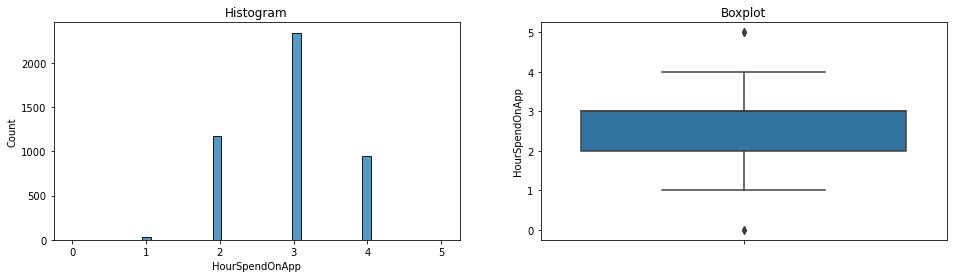


Nama variabel: HourSpendOnApp

Nilai Skewness:  -0.03253513211688751
Batas atas HourSpendOnApp: 6.0
Batas bawah HourSpendOnApp: -1.0

Outliers atas HourSpendOnApp : 0
Outliers bawah HourSpendOnApp : 0


In [53]:
diagnostic_plots(train, 'HourSpendOnApp')
print('\nNama variabel: HourSpendOnApp')
print('\nNilai Skewness: ', train['HourSpendOnApp'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'HourSpendOnApp', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas HourSpendOnApp:',skew_upper_bound)
print('Batas bawah HourSpendOnApp:',skew_lower_bound)
print('')
print('Outliers atas HourSpendOnApp : {}'.format(len(train[train['HourSpendOnApp'] > skew_upper_bound])))
print('Outliers bawah HourSpendOnApp : {}'.format(len(train[train['HourSpendOnApp'] < skew_lower_bound])))

##### 4.1.2.1.5 NumberOfDeviceRegistered

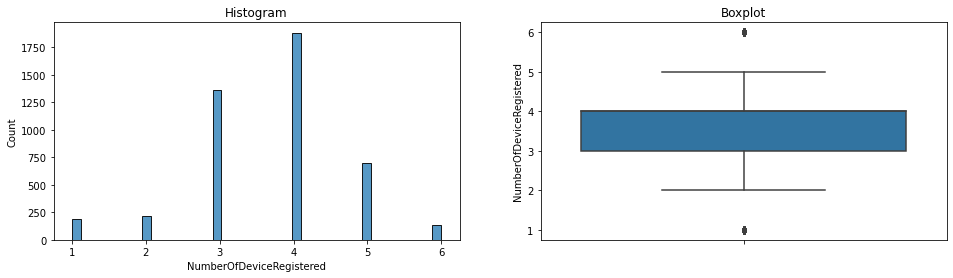


Nama variabel: NumberOfDeviceRegistered

Nilai Skewness:  -0.37772336193159406
Batas atas NumberOfDeviceRegistered: 7.0
Batas bawah NumberOfDeviceRegistered: 0.0

Outliers atas NumberOfDeviceRegistered : 0
Outliers bawah NumberOfDeviceRegistered : 0


In [54]:
diagnostic_plots(train, 'NumberOfDeviceRegistered')
print('\nNama variabel: NumberOfDeviceRegistered')
print('\nNilai Skewness: ', train['NumberOfDeviceRegistered'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'NumberOfDeviceRegistered', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas NumberOfDeviceRegistered:',skew_upper_bound)
print('Batas bawah NumberOfDeviceRegistered:',skew_lower_bound)
print('')
print('Outliers atas NumberOfDeviceRegistered : {}'.format(len(train[train['NumberOfDeviceRegistered'] > skew_upper_bound])))
print('Outliers bawah NumberOfDeviceRegistered : {}'.format(len(train[train['NumberOfDeviceRegistered'] < skew_lower_bound])))

##### 4.1.2.1.6 SatisfactionScore

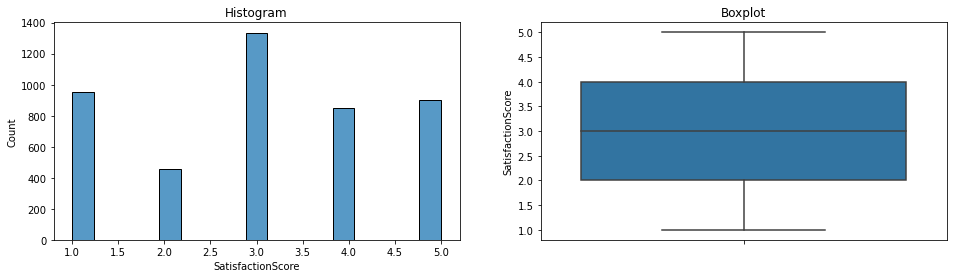


Nama variabel: SatisfactionScore

Nilai Skewness:  -0.14073116835402874
Batas atas SatisfactionScore: 10.0
Batas bawah SatisfactionScore: -4.0

Outliers atas SatisfactionScore : 0
Outliers bawah SatisfactionScore : 0


In [55]:
diagnostic_plots(train, 'SatisfactionScore')
print('\nNama variabel: SatisfactionScore')
print('\nNilai Skewness: ', train['SatisfactionScore'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'SatisfactionScore', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas SatisfactionScore:',skew_upper_bound)
print('Batas bawah SatisfactionScore:',skew_lower_bound)
print('')
print('Outliers atas SatisfactionScore : {}'.format(len(train[train['SatisfactionScore'] > skew_upper_bound])))
print('Outliers bawah SatisfactionScore : {}'.format(len(train[train['SatisfactionScore'] < skew_lower_bound])))

##### 4.1.2.1.7 NumberOfAddress

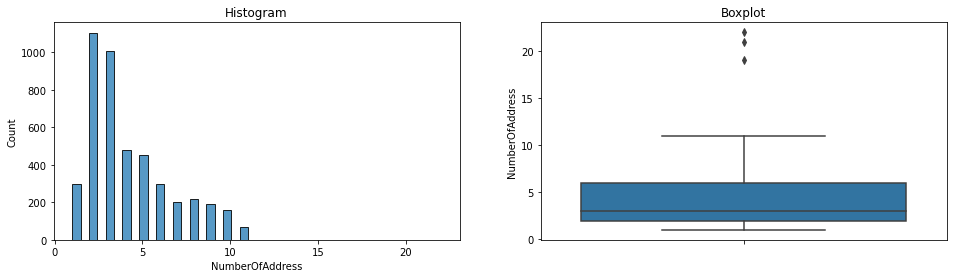


Nama variabel: NumberOfAddress

Nilai Skewness:  1.092123735092724
Batas atas NumberOfAddress: 18.0
Batas bawah NumberOfAddress: -10.0

Outliers atas NumberOfAddress : 3
Outliers bawah NumberOfAddress : 0


In [56]:
diagnostic_plots(train, 'NumberOfAddress')
print('\nNama variabel: NumberOfAddress')
print('\nNilai Skewness: ', train['NumberOfAddress'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'NumberOfAddress', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas NumberOfAddress:',skew_upper_bound)
print('Batas bawah NumberOfAddress:',skew_lower_bound)
print('')
print('Outliers atas NumberOfAddress : {}'.format(len(train[train['NumberOfAddress'] > skew_upper_bound])))
print('Outliers bawah NumberOfAddress : {}'.format(len(train[train['NumberOfAddress'] < skew_lower_bound])))

##### 4.1.2.1.8 OrderAmountHikeFromlastYear

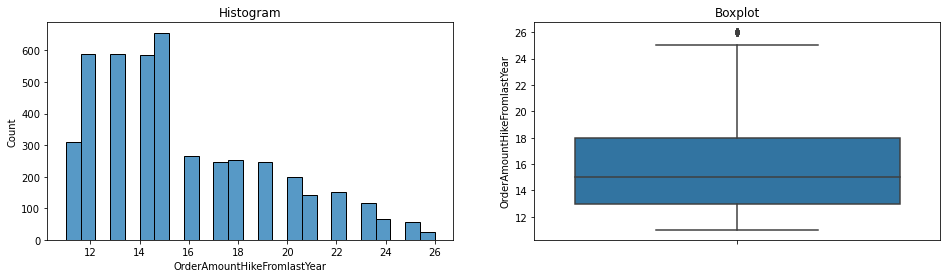


Nama variabel: OrderAmountHikeFromlastYear

Nilai Skewness:  0.8317289605996105
Batas atas OrderAmountHikeFromlastYear: 33.0
Batas bawah OrderAmountHikeFromlastYear: -2.0

Outliers atas OrderAmountHikeFromlastYear : 0
Outliers bawah OrderAmountHikeFromlastYear : 0


In [57]:
diagnostic_plots(train, 'OrderAmountHikeFromlastYear')
print('\nNama variabel: OrderAmountHikeFromlastYear')
print('\nNilai Skewness: ', train['OrderAmountHikeFromlastYear'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'OrderAmountHikeFromlastYear', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas OrderAmountHikeFromlastYear:',skew_upper_bound)
print('Batas bawah OrderAmountHikeFromlastYear:',skew_lower_bound)
print('')
print('Outliers atas OrderAmountHikeFromlastYear : {}'.format(len(train[train['OrderAmountHikeFromlastYear'] > skew_upper_bound])))
print('Outliers bawah OrderAmountHikeFromlastYear : {}'.format(len(train[train['OrderAmountHikeFromlastYear'] < skew_lower_bound])))

##### 4.1.2.1.9 CouponUsed

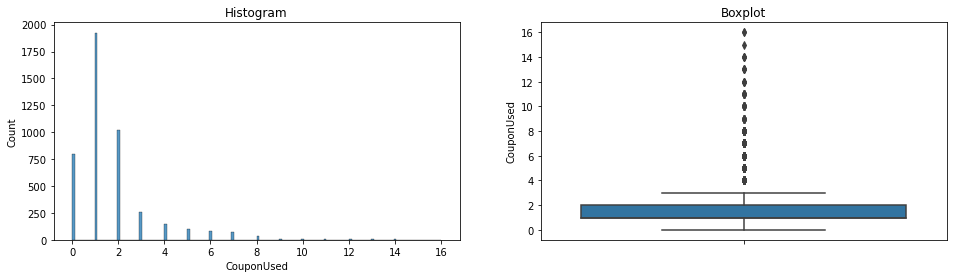


Nama variabel: CouponUsed

Nilai Skewness:  2.6661913511964235
Batas atas CouponUsed: 5.0
Batas bawah CouponUsed: -2.0

Outliers atas CouponUsed : 238
Outliers bawah CouponUsed : 0


In [58]:
diagnostic_plots(train, 'CouponUsed')
print('\nNama variabel: CouponUsed')
print('\nNilai Skewness: ', train['CouponUsed'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'CouponUsed', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas CouponUsed:',skew_upper_bound)
print('Batas bawah CouponUsed:',skew_lower_bound)
print('')
print('Outliers atas CouponUsed : {}'.format(len(train[train['CouponUsed'] > skew_upper_bound])))
print('Outliers bawah CouponUsed : {}'.format(len(train[train['CouponUsed'] < skew_lower_bound])))

##### 4.1.2.1.10 OrderCount

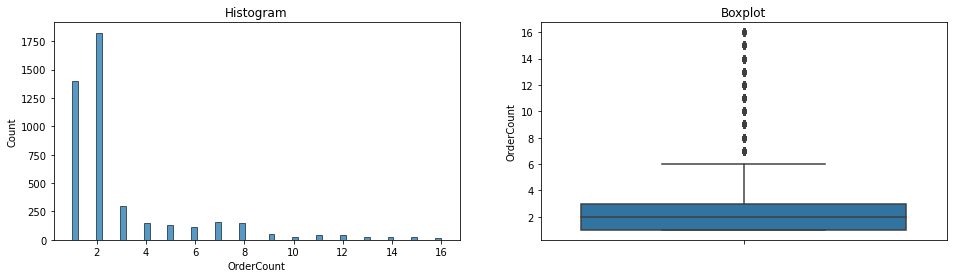


Nama variabel: OrderCount

Nilai Skewness:  2.281055984019132
Batas atas OrderCount: 9.0
Batas bawah OrderCount: -5.0

Outliers atas OrderCount : 215
Outliers bawah OrderCount : 0


In [59]:
diagnostic_plots(train, 'OrderCount')
print('\nNama variabel: OrderCount')
print('\nNilai Skewness: ', train['OrderCount'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'OrderCount', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas OrderCount:',skew_upper_bound)
print('Batas bawah OrderCount:',skew_lower_bound)
print('')
print('Outliers atas OrderCount : {}'.format(len(train[train['OrderCount'] > skew_upper_bound])))
print('Outliers bawah OrderCount : {}'.format(len(train[train['OrderCount'] < skew_lower_bound])))

##### 4.1.2.1.11 DaySinceLastOrder

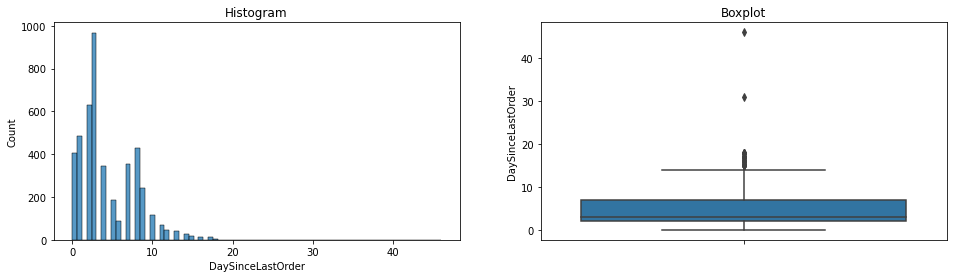


Nama variabel: DaySinceLastOrder

Nilai Skewness:  1.3153753168290727
Batas atas DaySinceLastOrder: 22.0
Batas bawah DaySinceLastOrder: -13.0

Outliers atas DaySinceLastOrder : 2
Outliers bawah DaySinceLastOrder : 0


In [60]:
diagnostic_plots(train, 'DaySinceLastOrder')
print('\nNama variabel: DaySinceLastOrder')
print('\nNilai Skewness: ', train['DaySinceLastOrder'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'DaySinceLastOrder', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas DaySinceLastOrder:',skew_upper_bound)
print('Batas bawah DaySinceLastOrder:',skew_lower_bound)
print('')
print('Outliers atas DaySinceLastOrder : {}'.format(len(train[train['DaySinceLastOrder'] > skew_upper_bound])))
print('Outliers bawah DaySinceLastOrder : {}'.format(len(train[train['DaySinceLastOrder'] < skew_lower_bound])))

##### 4.1.2.1.12 CashbackAmount

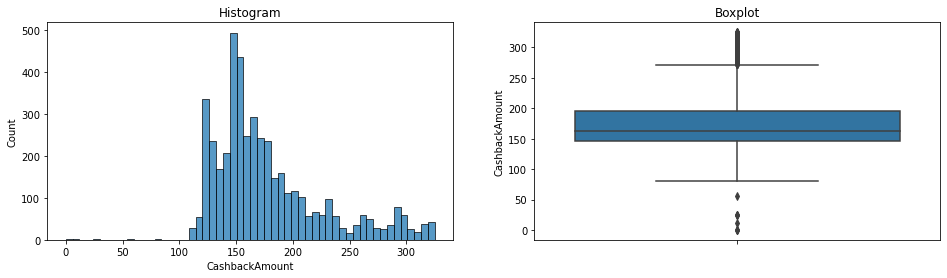


Nama variabel: CashbackAmount

Nilai Skewness:  1.1521665145873397
Batas atas CashbackAmount: 346.0
Batas bawah CashbackAmount: -4.0

Outliers atas CashbackAmount : 0
Outliers bawah CashbackAmount : 0


In [61]:
diagnostic_plots(train, 'CashbackAmount')
print('\nNama variabel: CashbackAmount')
print('\nNilai Skewness: ', train['CashbackAmount'].skew())

skew_upper_bound, skew_lower_bound = find_skewed_boundaries(train, 'CashbackAmount', 3)
skew_upper_bound, skew_lower_bound

print('Batas atas CashbackAmount:',skew_upper_bound)
print('Batas bawah CashbackAmount:',skew_lower_bound)
print('')
print('Outliers atas CashbackAmount : {}'.format(len(train[train['CashbackAmount'] > skew_upper_bound])))
print('Outliers bawah CashbackAmount : {}'.format(len(train[train['CashbackAmount'] < skew_lower_bound])))

#### 4.1.2.2 Penanganan Outlier dengan metode capping

Saya hanya melakukan capping pada data berskewness tinggi atau melebihi 1.

In [62]:
capper_normal = Winsorizer(capping_method='gaussian', tail='both', fold=3, 

variables=['WarehouseToHome','NumberOfAddress','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount'])


capper_normal.fit(train)
train_cln = capper_normal.transform(train)
test_cln = capper_normal.transform(test)

In [63]:
train_cln.describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,4488.0,0.168004,0.373911,0.000000,0.0,0.0,0.0,1.000000
Tenure,4488.0,10.087344,8.434012,0.000000,3.0,9.0,15.0,61.000000
CityTier,4488.0,1.668226,0.920387,1.000000,1.0,1.0,3.0,3.000000
WarehouseToHome,4488.0,15.504993,8.070420,5.000000,9.0,14.0,20.0,40.703672
HourSpendOnApp,4488.0,2.937166,0.705968,0.000000,2.0,3.0,3.0,5.000000
NumberOfDeviceRegistered,4488.0,3.689394,1.026180,1.000000,3.0,4.0,4.0,6.000000
SatisfactionScore,4488.0,3.064840,1.391186,1.000000,2.0,3.0,4.0,5.000000
NumberOfAddress,4488.0,4.188893,2.546379,1.000000,2.0,3.0,6.0,11.917428
Complain,4488.0,0.281417,0.449741,0.000000,0.0,0.0,1.0,1.000000
OrderAmountHikeFromlastYear,4488.0,15.664884,3.578281,11.000000,13.0,15.0,18.0,26.000000


#### 4.1.2.3 Melihat hasil capping

In [64]:
print('train - Sebelum Capping')
print(train[['WarehouseToHome', 'NumberOfAddress','CouponUsed','OrderCount']].describe())
print('')
print('train - Setelah Capping')
print(train_cln[['WarehouseToHome', 'NumberOfAddress','CouponUsed','OrderCount']].describe())

train - Sebelum Capping
       WarehouseToHome  NumberOfAddress   CouponUsed   OrderCount
count      4488.000000      4488.000000  4488.000000  4488.000000
mean         15.543226         4.194742     1.705660     2.968137
std           8.386815         2.574229     1.837151     2.909543
min           5.000000         1.000000     0.000000     1.000000
25%           9.000000         2.000000     1.000000     1.000000
50%          14.000000         3.000000     1.000000     2.000000
75%          20.000000         6.000000     2.000000     3.000000
max         127.000000        22.000000    16.000000    16.000000

train - Setelah Capping
       WarehouseToHome  NumberOfAddress   CouponUsed   OrderCount
count      4488.000000      4488.000000  4488.000000  4488.000000
mean         15.504993         4.188893     1.655976     2.903149
std           8.070420         2.546379     1.614851     2.670367
min           5.000000         1.000000     0.000000     1.000000
25%           9.000000     

In [65]:
print('train - Sebelum Capping')
print(train[['DaySinceLastOrder', 'CashbackAmount']].describe())
print('')
print('train - Setelah Capping')
print(train_cln[['DaySinceLastOrder', 'CashbackAmount']].describe())

train - Sebelum Capping
       DaySinceLastOrder  CashbackAmount
count        4488.000000     4488.000000
mean            4.421569      177.203654
std             3.549403       49.093498
min             0.000000        0.000000
25%             2.000000      146.000000
50%             3.000000      163.000000
75%             7.000000      196.000000
max            46.000000      325.000000

train - Setelah Capping
       DaySinceLastOrder  CashbackAmount
count        4488.000000     4488.000000
mean            4.398909      177.230596
std             3.438033       49.003503
min             0.000000       29.923159
25%             2.000000      146.000000
50%             3.000000      163.000000
75%             7.000000      196.000000
max            15.069777      324.484149


## 4.2 memilih fitur

### 4.2.1 Mengubah tipe data yang seharusnya merupakan tipe data string/object

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [67]:
df['Complain'] = df['Complain'].apply(str)
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].apply(str)
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].apply(str)
df['Gender'] = df['Gender'].apply(str)
df['PreferedOrderCat'] = df['PreferedOrderCat'].apply(str)
df['MaritalStatus'] = df['MaritalStatus'].apply(str)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

### 4.2.2 Memisahkan data numerik dan kategorial

In [69]:
# memisahkan data numerik
num_cols_for_feature_select = df.select_dtypes(include=np.number).columns.to_list()
# memisahkan data kategorial
cat_cols_for_feature_select = df.select_dtypes(include = ['object']).columns.to_list()

print('Numerical Columns:', num_cols_for_feature_select)
print('Categorical Columns:', cat_cols_for_feature_select)

Numerical Columns: ['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
Categorical Columns: ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']


In [70]:
df_num = df[num_cols_for_feature_select]
df_cat = df[cat_cols_for_feature_select]
df_cat_targ = df_num['Churn']

df_num.drop(columns='Churn', inplace=True)

c:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### 4.2.3 Pengamatan korelasi

#### 4.2.3.1 Fitur Numerikal dengan Heatmap

<AxesSubplot:>

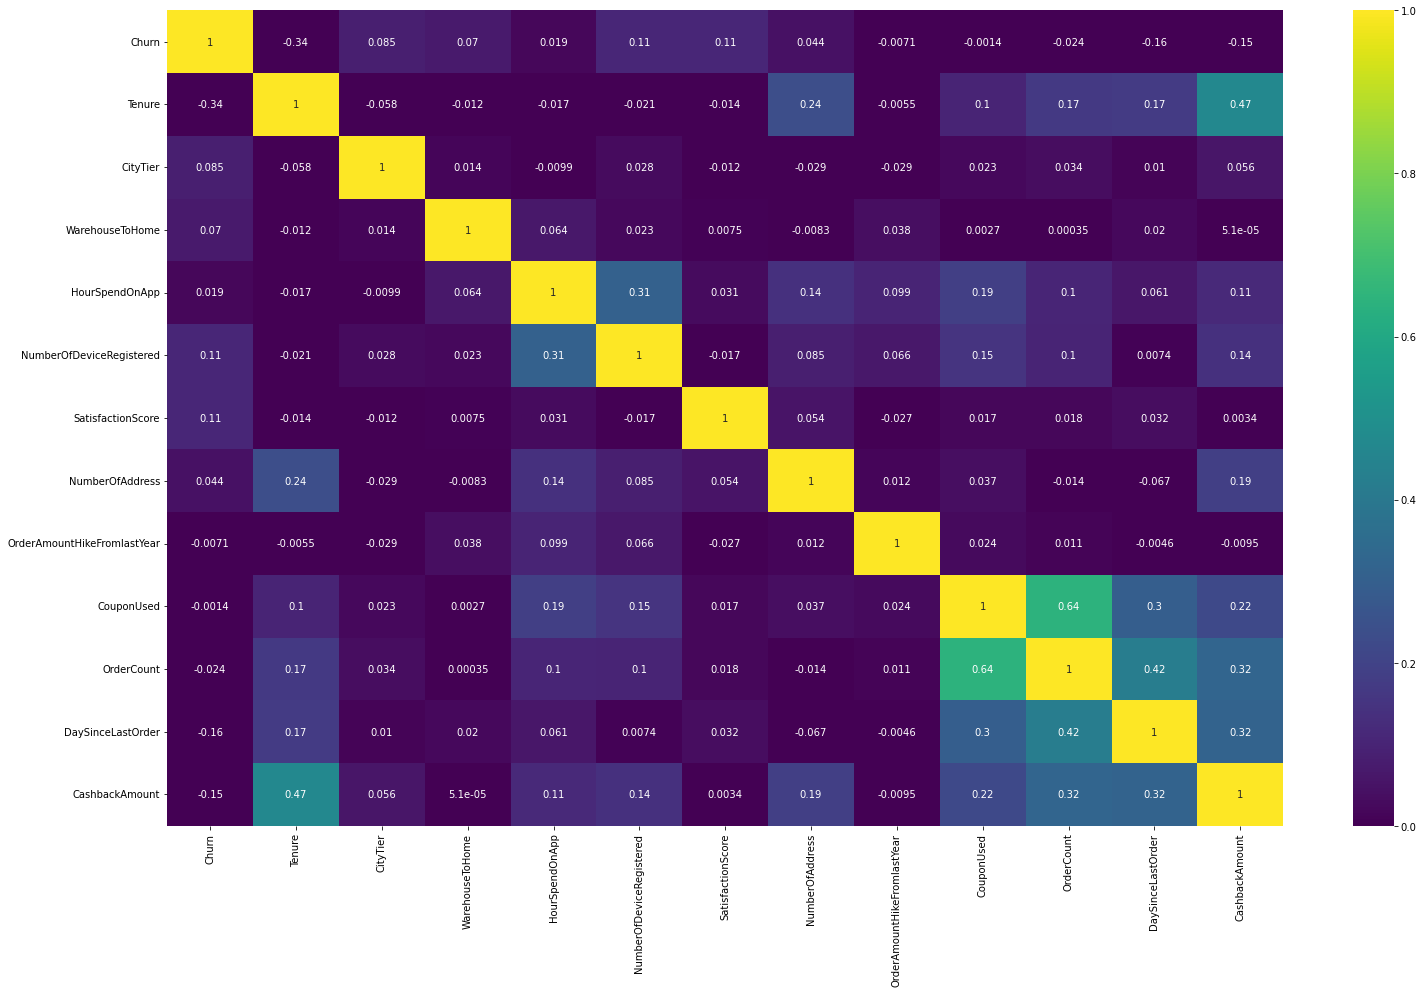

In [71]:
# Memilh ukuran visualisasi
fig = plt.figure(figsize = (25, 15))
# menyiapkan heatmap
sns.heatmap(df.corr(),
            vmin = 0,
            vmax = 1,
            annot = True,
            cmap='viridis')

#### 4.2.3.2 Fitur categorial dengan chi-square test

In [72]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   PreferredLoginDevice  5630 non-null   object
 1   PreferredPaymentMode  5630 non-null   object
 2   Gender                5630 non-null   object
 3   PreferedOrderCat      5630 non-null   object
 4   MaritalStatus         5630 non-null   object
 5   Complain              5630 non-null   object
dtypes: object(6)
memory usage: 264.0+ KB


In [73]:
# Membuat duplikat untuk melakukan pengamatan korelasi
df_ftr_slc_cat = df_cat.copy(deep=True)

# Fungsi untuk memakai encoder ordinal
oec = OrdinalEncoder()

# Encode data
oec.fit(df_ftr_slc_cat[[
    'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']])

# Penerapan encode data
df_ftr_slc_cat[[
    'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']] = oec.transform(df_ftr_slc_cat[[
        'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'Complain']])

# Melihat 2 data awal
df_ftr_slc_cat.head(2)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Complain
0,1.0,4.0,0.0,2.0,2.0,1.0
1,2.0,6.0,1.0,3.0,2.0,1.0


In [74]:
# Membuat definisi chi square
test = SelectKBest(score_func=chi2, k=4)
# memasukan kalkulasi fit
fit = test.fit(df_ftr_slc_cat, df_cat_targ)
# memperliahtkan nilai hasil
fit.scores_

array([  0.53879361,   2.15451611,   1.92337615,  66.92639993,
        41.86427639, 252.00409939])

In [75]:
# membulatkan hasil nilai
np.round_(fit.scores_)

array([  1.,   2.,   2.,  67.,  42., 252.])

In [76]:
#menyesuaikan dengan fitur ketegorial
chi = pd.Series(fit.scores_)
chi.index = df_ftr_slc_cat.columns
chi.sort_values(ascending=False)

Complain                252.004099
PreferedOrderCat         66.926400
MaritalStatus            41.864276
PreferredPaymentMode      2.154516
Gender                    1.923376
PreferredLoginDevice      0.538794
dtype: float64

### 4.2.4 Kesimpulan pemilihan fitur

Saya tidak menggunakan kolom CouponUsed dan PreferredLoginDevice karena mempunyai korelasi paling mendekati 0 (korelasi dengan kolom target, yaitu 'Churn')

In [77]:
df['Complain'] = df['Complain'].apply(int)

## 4.3 Menyiapkan data inferensial

In [78]:
# mengambil sampel dengan nomor random 114
data_inf = df.sample(20, random_state=114)
data_inf

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
3199,0,7.0,Computer,1,13.0,Debit Card,Male,2.0,4,Laptop & Accessory,2,Married,5,0,24.0,5.0,5.0,8.0,202
189,0,12.0,Mobile Phone,1,16.0,Credit Card,Male,2.0,3,Grocery,5,Divorced,2,1,14.0,1.0,11.0,10.0,271
3905,0,9.0,Computer,1,9.0,Credit Card,Male,4.0,5,Mobile Phone,1,Single,2,1,15.0,2.0,2.0,5.0,174
1842,0,17.0,Mobile Phone,1,9.0,UPI,Male,2.0,3,Others,1,Married,5,1,15.0,0.0,1.0,1.0,295
96,0,6.0,Phone,1,14.0,CC,Female,2.0,4,Mobile,4,Divorced,7,0,21.0,0.0,1.0,1.0,126
1898,0,13.0,Phone,1,14.0,CC,Female,2.0,4,Mobile,1,Single,1,1,20.0,0.0,2.0,3.0,123
4299,0,4.0,Mobile Phone,2,16.0,UPI,Male,3.0,4,Laptop & Accessory,1,Married,2,1,20.0,5.0,5.0,8.0,188
4951,1,1.0,Mobile Phone,3,11.0,Cash on Delivery,Male,3.0,4,Fashion,5,Single,2,1,23.0,3.0,5.0,3.0,221
3095,1,1.0,Mobile Phone,1,10.0,Credit Card,Male,4.0,4,Mobile Phone,5,Divorced,7,0,14.0,2.0,2.0,3.0,165
2845,0,3.0,Computer,1,7.0,COD,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,14.0,1.0,2.0,10.0,168


In [79]:
data_train_test = df.drop(data_inf.index)
data_train_test

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,1,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,1,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


In [80]:
data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)

Seperti yang saya ketik pada bagian 4.2.4 , Saya akan mengeluarkan data CouponUsed dan PreferredLoginDevice karena mempunyai korelasi paling mendekati 0 (korelasi dengan kolom target, yaitu 'Churn'). Dan juga saya mengeluarkan data CHURN, karena merupakan data target.

In [81]:
data_inf_final = data_inf.drop(['CouponUsed','PreferredLoginDevice','Churn'], axis=1)

## 4.4 Memisahkan Data

### 4.4.1 Membuat data fitur (X) dan data target (y)

In [82]:
X = data_train_test.drop(columns='Churn', axis=1)
y = data_train_test['Churn']
X

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,9.0,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,9.0,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,0.0,Phone,1,12.0,CC,Male,3.0,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5605,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,151
5606,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,3.0,225
5607,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186
5608,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,179


### 4.4.2 Memisahkan data latih/train dan data ujian/test

In [83]:
train, test = train_test_split(data_train_test, test_size=0.2, stratify=y, random_state=114)

print('Train size: ', train.shape)
print('Test size: ', test.shape)

Train size:  (4488, 19)
Test size:  (1122, 19)


In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4488 entries, 5056 to 2934
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        4488 non-null   int64  
 1   Tenure                       4488 non-null   float64
 2   PreferredLoginDevice         4488 non-null   object 
 3   CityTier                     4488 non-null   int64  
 4   WarehouseToHome              4488 non-null   float64
 5   PreferredPaymentMode         4488 non-null   object 
 6   Gender                       4488 non-null   object 
 7   HourSpendOnApp               4488 non-null   float64
 8   NumberOfDeviceRegistered     4488 non-null   int64  
 9   PreferedOrderCat             4488 non-null   object 
 10  SatisfactionScore            4488 non-null   int64  
 11  MaritalStatus                4488 non-null   object 
 12  NumberOfAddress              4488 non-null   int64  
 13  Complain       

In [85]:
train = train.drop(['CouponUsed','PreferredLoginDevice'], axis=1)
test = test.drop(['CouponUsed','PreferredLoginDevice'], axis=1)
train

,Churn,Tenure,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
5056,1,9.0,3,9.0,E wallet,Female,4.0,6,Others,4,Single,4,1,15.0,2.0,12.0,313
2073,0,0.0,1,14.0,Debit Card,Male,3.0,5,Mobile,5,Married,2,0,15.0,1.0,1.0,125
1024,0,1.0,1,33.0,Credit Card,Female,2.0,5,Laptop & Accessory,5,Married,1,0,21.0,1.0,0.0,0
4703,0,6.0,1,31.0,Debit Card,Male,4.0,4,Laptop & Accessory,1,Married,3,0,16.0,5.0,8.0,178
3298,0,9.0,1,34.0,Credit Card,Female,3.0,5,Mobile Phone,5,Single,3,0,12.0,2.0,2.0,151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,1,9.0,3,13.0,Debit Card,Male,3.0,3,Mobile,1,Married,2,1,21.0,1.0,2.0,123
3064,0,10.0,3,9.0,Credit Card,Male,4.0,5,Fashion,3,Divorced,3,0,14.0,10.0,1.0,201
5161,0,10.0,1,11.0,Debit Card,Male,3.0,5,Laptop & Accessory,1,Single,3,0,17.0,2.0,9.0,183
4666,0,1.0,3,10.0,Credit Card,Female,4.0,2,Laptop & Accessory,1,Married,3,1,21.0,2.0,5.0,171


In [86]:
# Separate majority and minority classes
df_majority = train[train.Churn== 0]
df_minority = train[train.Churn== 1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,      # sample without replacement
                                 n_samples=1240,     # to match minority class
                                 random_state=114)   # reproducible results
 
# Combine minority class with downsampled majority class
Train_df_downsampled = pd.concat([df_majority_downsampled, df_minority])

# Display new class counts
Train_df_downsampled.Churn.value_counts()

0    1240
1     754
Name: Churn, dtype: int64

In [87]:
train['Churn'].value_counts()

0    3734
1     754
Name: Churn, dtype: int64

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4488 entries, 5056 to 2934
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        4488 non-null   int64  
 1   Tenure                       4488 non-null   float64
 2   CityTier                     4488 non-null   int64  
 3   WarehouseToHome              4488 non-null   float64
 4   PreferredPaymentMode         4488 non-null   object 
 5   Gender                       4488 non-null   object 
 6   HourSpendOnApp               4488 non-null   float64
 7   NumberOfDeviceRegistered     4488 non-null   int64  
 8   PreferedOrderCat             4488 non-null   object 
 9   SatisfactionScore            4488 non-null   int64  
 10  MaritalStatus                4488 non-null   object 
 11  NumberOfAddress              4488 non-null   int64  
 12  Complain                     4488 non-null   int64  
 13  OrderAmountHike

### 4.4.3 Membuat data fitur (X) dan data target (y) pada data latih/train dan ujian/test

In [89]:
X_train = Train_df_downsampled.drop(columns='Churn')
y_train = Train_df_downsampled['Churn']

X_test = test.drop(columns='Churn')
y_test = test['Churn']

#### 4.4.4 Memisahkan data fitur yang numerik dan yang kategorikal

In [90]:
num_columns = X_train.select_dtypes(include=np.number).columns.to_list()
cat_columns = X_train.select_dtypes(include=['object']).columns.to_list()

print('Numerical Features:', num_columns)
print('Categorical Features:', cat_columns)

Numerical Features: ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']
Categorical Features: ['PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']


In [91]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

### 4.4.5 Scalling dan Encoding

#### 4.4.5.1 Scaling

In [92]:
X_train_num

,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,OrderCount,DaySinceLastOrder,CashbackAmount
5547,1.0,1,8.0,3.0,5,3,3,0,13.0,2.0,3.0,171
577,8.0,3,9.0,3.0,3,2,7,0,13.0,1.0,8.0,178
5282,18.0,1,14.0,3.0,4,1,2,1,15.0,2.0,11.0,315
4258,28.0,2,33.0,2.0,2,1,4,1,15.0,5.0,5.0,298
3555,16.0,2,9.0,4.0,2,5,9,0,17.0,2.0,4.0,188
...,...,...,...,...,...,...,...,...,...,...,...,...
196,0.0,1,8.0,2.0,5,2,6,1,13.0,2.0,2.0,135
1776,0.0,1,21.0,2.0,3,3,8,1,12.0,2.0,7.0,236
3192,1.0,1,10.0,4.0,4,5,3,1,12.0,10.0,8.0,158
1844,8.0,3,32.0,3.0,3,5,3,0,14.0,1.0,0.0,143


In [93]:
scaler = MinMaxScaler()
scaler.fit(X_train_num)

X_train_num_scld = scaler.transform(X_train_num)
X_test_num_scld = scaler.transform(X_test_num)

X_train_num_scld

array([[0.01639344, 0.        , 0.09677419, ..., 0.06666667, 0.06521739,
        0.52777778],
       [0.13114754, 1.        , 0.12903226, ..., 0.        , 0.17391304,
        0.54938272],
       [0.29508197, 0.        , 0.29032258, ..., 0.06666667, 0.23913043,
        0.97222222],
       ...,
       [0.01639344, 0.        , 0.16129032, ..., 0.6       , 0.17391304,
        0.48765432],
       [0.13114754, 1.        , 0.87096774, ..., 0.        , 0.        ,
        0.44135802],
       [0.14754098, 1.        , 0.25806452, ..., 0.        , 0.04347826,
        0.37962963]])

#### 4.4.5.2 Encoding

In [94]:
X_train_cat

,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
5547,Debit Card,Male,Laptop & Accessory,Single
577,Debit Card,Male,Fashion,Married
5282,Credit Card,Female,Others,Married
4258,UPI,Female,Grocery,Single
3555,Credit Card,Male,Laptop & Accessory,Divorced
...,...,...,...,...
196,CC,Male,Mobile,Divorced
1776,Credit Card,Male,Fashion,Married
3192,Debit Card,Male,Mobile Phone,Single
1844,Debit Card,Female,Laptop & Accessory,Married


In [95]:
# feature encoding menggunakan OneHotEncoder

encoder = OneHotEncoder(handle_unknown = 'ignore')
encoder.fit(X_train_cat)

X_train_cat_enc = encoder.transform(X_train_cat).toarray()
X_test_cat_enc = encoder.transform(X_test_cat).toarray()

X_train_cat_enc

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

#### 4.4.5.3 Menggabungkan lagi kolom numerik dan kolom kategorikal

In [96]:
# menggabungkan kolom numerikal yang sudah di-scaled dengan kolom kategorikal yang sudah di-encoded

X_train_final = np.concatenate([X_train_num_scld, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_scld, X_test_cat_enc], axis=1)

X_train_final

array([[0.01639344, 0.        , 0.09677419, ..., 0.        , 0.        ,
        1.        ],
       [0.13114754, 1.        , 0.12903226, ..., 0.        , 1.        ,
        0.        ],
       [0.29508197, 0.        , 0.29032258, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.01639344, 0.        , 0.16129032, ..., 0.        , 0.        ,
        1.        ],
       [0.13114754, 1.        , 0.87096774, ..., 0.        , 1.        ,
        0.        ],
       [0.14754098, 1.        , 0.25806452, ..., 0.        , 1.        ,
        0.        ]])

In [97]:
# membuat dataframe untuk X_train_final

X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.016393,0.0,0.096774,0.666667,0.8,0.50,0.111111,0.0,0.133333,0.066667,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.131148,1.0,0.129032,0.666667,0.4,0.25,0.333333,0.0,0.133333,0.000000,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.295082,0.0,0.290323,0.666667,0.6,0.00,0.055556,1.0,0.266667,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.459016,0.5,0.903226,0.333333,0.2,0.00,0.166667,1.0,0.266667,0.266667,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.262295,0.5,0.129032,1.000000,0.2,1.00,0.444444,0.0,0.400000,0.066667,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,0.000000,0.0,0.096774,0.333333,0.8,0.25,0.277778,1.0,0.133333,0.066667,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1990,0.000000,0.0,0.516129,0.333333,0.4,0.50,0.388889,1.0,0.066667,0.066667,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1991,0.016393,0.0,0.161290,1.000000,0.6,1.00,0.111111,1.0,0.066667,0.600000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1992,0.131148,1.0,0.870968,0.666667,0.4,1.00,0.111111,0.0,0.200000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [98]:
y_train

5547    0
577     0
5282    0
4258    0
3555    0
       ..
196     1
1776    1
3192    1
1844    1
2550    1
Name: Churn, Length: 1994, dtype: int64

In [99]:
# membuat dataframe untuk y_train

y_train_df = pd.DataFrame(y_train)
y_train_df

,Churn
5547,0
577,0
5282,0
4258,0
3555,0
...,...
196,1
1776,1
3192,1
1844,1


In [100]:
y_train_df['Churn'].value_counts()

0    1240
1     754
Name: Churn, dtype: int64

### 4.4.6 Pipeline Preprocessing

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5630 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5630 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5630 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [102]:
num_pipeline = Pipeline([
        ('imputer1', SimpleImputer(strategy="median")),
        ('sensoring', Winsorizer(capping_method='gaussian', tail='both', fold=3)),
        ('std_scaler', MinMaxScaler())
    ])

train_num_tr = num_pipeline.fit_transform(X_train_num)

In [103]:
cat_pipeline = Pipeline([
        ('imputer2', SimpleImputer(strategy="most_frequent")),
        ('std_scaler', OneHotEncoder())
    ])

train_cat_tr = cat_pipeline.fit_transform(X_train_cat)

In [104]:
from sklearn.compose import ColumnTransformer

num_attribs = ['Tenure','CityTier','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain','OrderAmountHikeFromlastYear','OrderCount','DaySinceLastOrder','CashbackAmount']
cat_attribs = ['PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

train_prepared = full_pipeline.fit_transform(X_train)

# 5. Modelling

## 5.1 Logistic Regression

### 5.1.1 Model Definition

In [105]:
# mendefiniskan model yang digunakan

log_model = LogisticRegression()

### 5.1.2 Model Training

In [106]:
log_model.fit(X_train_final, y_train)

LogisticRegression()

### 5.1.3 Model Evaluation

In [107]:
# proses prediksi harga pada data train dan data test

y_pred_train_log = log_model.predict(X_train_final)
y_pred_test_log = log_model.predict(X_test_final)

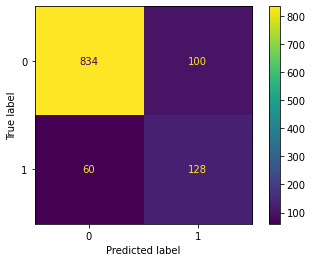

In [108]:
# menampilkan hasil prediksi data test dengan confusion matrix

cm = confusion_matrix(y_test, y_pred_test_log, labels=log_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)

disp.plot()
plt.show()

### 5.1.4 Metric Evaluation

In [109]:
# menampilkan metric evaluasi

y_prob_train = log_model.predict_proba(X_train_final)[:,1]
y_prob_test = log_model.predict_proba(X_test_final)[:,1]

print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_log, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_log, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test))

========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1240
           1       0.78      0.72      0.75       754

    accuracy                           0.82      1994
   macro avg       0.81      0.80      0.80      1994
weighted avg       0.82      0.82      0.82      1994

ROC-AUC Score Train: 0.8883150081286899


========== TEST ==========
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       934
           1       0.56      0.68      0.62       188

    accuracy                           0.86      1122
   macro avg       0.75      0.79      0.76      1122
weighted avg       0.87      0.86      0.86      1122

ROC-AUC Score Test: 0.8746412137227209


## 5.2 SVM

### 5.2.1 Model Deifnition

In [110]:
svm_model = SVC(probability=True)

### 5.2.2 Model Training

In [111]:
svm_model.fit(X_train_final, y_train)

SVC(probability=True)

### 5.2.3 Model Evaluation 

In [112]:
# proses prediksi harga pada data train dan data test

y_pred_train_svm = svm_model.predict(X_train_final)
y_pred_test_svm = svm_model.predict(X_test_final)

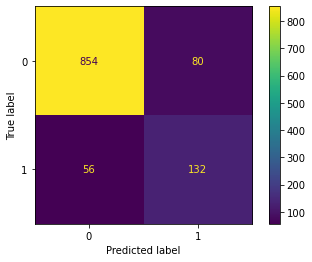

In [113]:
# menampilkan hasil prediksi data test dengan confusion matrix

cm = confusion_matrix(y_test, y_pred_test_svm, labels=svm_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_model.classes_)

disp.plot()
plt.show()

### 5.2.4 Metric Evaluation

In [114]:
# menampilkan metric evaluasi

y_prob_train_svm = svm_model.predict_proba(X_train_final)[:,1]
y_prob_test_svm = svm_model.predict_proba(X_test_final)[:,1]

print('SVM evaluation matric:')
print('\n')
print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_svm, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train_svm))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_svm, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test_svm))

SVM evaluation matric:


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1240
           1       0.86      0.76      0.80       754

    accuracy                           0.86      1994
   macro avg       0.86      0.84      0.85      1994
weighted avg       0.86      0.86      0.86      1994

ROC-AUC Score Train: 0.9366871310002567


========== TEST ==========
              precision    recall  f1-score   support

           0       0.94      0.91      0.93       934
           1       0.62      0.70      0.66       188

    accuracy                           0.88      1122
   macro avg       0.78      0.81      0.79      1122
weighted avg       0.89      0.88      0.88      1122

ROC-AUC Score Test: 0.8863330903458015


## 5.3 Decision Tree

### 5.2.1 Model Definition

In [115]:
dtc_model = DecisionTreeClassifier()

### 5.2.2 Model Training

In [116]:
start = time()
dtc_model.fit(X_train_final,y_train)
end = time()

print(f"Durasi training: {end-start} detik")

Durasi training: 0.02393484115600586 detik


### 5.2.3 Model Evaluation

In [117]:
# proses prediksi harga pada data train dan data test

y_pred_train_dtc = dtc_model.predict(X_train_final)
y_pred_test_dtc = dtc_model.predict(X_test_final)

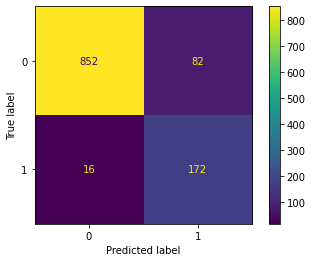

In [118]:
# menampilkan hasil prediksi data test dengan confusion matrix

cm = confusion_matrix(y_test, y_pred_test_dtc, labels=dtc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc_model.classes_)

disp.plot()
plt.show()

### 5.2.4 Metric Evaluation

In [119]:
# menampilkan metric evaluasi

y_prob_train_dtc = dtc_model.predict_proba(X_train_final)[:,1]
y_prob_test_dtc = dtc_model.predict_proba(X_test_final)[:,1]

print('Decision Tree evaluation matric:')
print('\n')
print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_pred_train_dtc, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train_dtc))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_pred_test_dtc, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test_dtc))

Decision Tree evaluation matric:


========== TRAINING ==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1240
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1994
   macro avg       1.00      1.00      1.00      1994
weighted avg       1.00      1.00      1.00      1994

ROC-AUC Score Train: 1.0


========== TEST ==========
              precision    recall  f1-score   support

           0       0.98      0.91      0.95       934
           1       0.68      0.91      0.78       188

    accuracy                           0.91      1122
   macro avg       0.83      0.91      0.86      1122
weighted avg       0.93      0.91      0.92      1122

ROC-AUC Score Test: 0.9135495922365483


## 5.4 Random Forest

### 5.4.1 Model Definition

In [120]:
rf_model = RandomForestClassifier()

### 5.4.2 Model Training

In [121]:
start = time()
rf_model.fit(X_train_final,y_train)
end = time()
print(f"Durasi training: {end-start} detik")

Durasi training: 0.419877290725708 detik


### 5.4.3 Model Evaluation

In [122]:
y_train_pred_rf = rf_model.predict(X_train_final)
y_test_pred_rf = rf_model.predict(X_test_final)

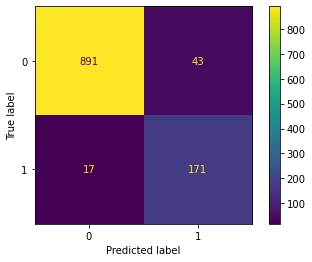

In [123]:
# menampilkan hasil prediksi data test dengan confusion matrix

cm = confusion_matrix(y_test, y_test_pred_rf, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)

disp.plot()
plt.show()

### 5.4.4 Metric Evaluation

In [124]:
# menampilkan metric evaluasi

y_prob_train_rf = rf_model.predict_proba(X_train_final)[:,1]
y_prob_test_rf = rf_model.predict_proba(X_test_final)[:,1]

print('Random Forest evaluation matric:')
print('\n')
print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_train_pred_rf, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train_rf))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_test_pred_rf, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test_rf))

Random Forest evaluation matric:


========== TRAINING ==========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1240
           1       1.00      1.00      1.00       754

    accuracy                           1.00      1994
   macro avg       1.00      1.00      1.00      1994
weighted avg       1.00      1.00      1.00      1994

ROC-AUC Score Train: 1.0


========== TEST ==========
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       934
           1       0.80      0.91      0.85       188

    accuracy                           0.95      1122
   macro avg       0.89      0.93      0.91      1122
weighted avg       0.95      0.95      0.95      1122

ROC-AUC Score Test: 0.9876304159642808


## 5.5 KNN

### 5.5.1 Model Definition

In [125]:
knn_model = KNeighborsClassifier()

### 5.5.2 Model Training

In [126]:
start = time()
knn_model.fit(X_train_final,y_train)
end = time()
print(f"Durasi training: {end-start} detik")

Durasi training: 0.001992940902709961 detik


### 5.5.3 Model Evaluation

In [127]:
y_train_pred_knn = knn_model.predict(X_train_final)
y_test_pred_knn = knn_model.predict(X_test_final)

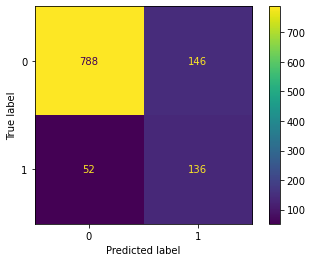

In [128]:
# menampilkan hasil prediksi data test dengan confusion matrix

cm = confusion_matrix(y_test, y_test_pred_knn, labels=knn_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_model.classes_)

disp.plot()
plt.show()

### 5.5.4 Metric Evaluation

In [129]:
# menampilkan metric evaluasi

y_prob_train_knn = knn_model.predict_proba(X_train_final)[:,1]
y_prob_test_knn = knn_model.predict_proba(X_test_final)[:,1]

print('Decision Tree evaluation matric:')
print('\n')
print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_train_pred_knn, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train_knn))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_test_pred_knn, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test_knn))

Decision Tree evaluation matric:


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1240
           1       0.81      0.81      0.81       754

    accuracy                           0.85      1994
   macro avg       0.85      0.84      0.85      1994
weighted avg       0.85      0.85      0.85      1994

ROC-AUC Score Train: 0.93450842816805


========== TEST ==========
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       934
           1       0.48      0.72      0.58       188

    accuracy                           0.82      1122
   macro avg       0.71      0.78      0.73      1122
weighted avg       0.86      0.82      0.84      1122

ROC-AUC Score Test: 0.8517927923823408


## 5.6 Naive Bayes

### 5.6.1 Model Definition

In [130]:
nb_model = GaussianNB()

### 5.6.2 Model Training

In [131]:
start = time()
nb_model.fit(X_train_final,y_train)
end = time()
print(f"Durasi training: {end-start} detik")

Durasi training: 0.003988742828369141 detik


### 5.6.3 Model Evaluation

In [132]:
y_train_pred_nb = nb_model.predict(X_train_final)
y_test_pred_nb = nb_model.predict(X_test_final)

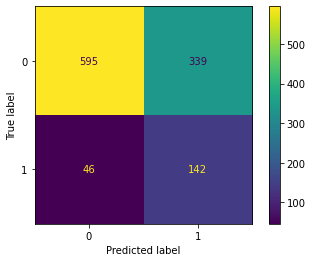

In [133]:
# menampilkan hasil prediksi data test dengan confusion matrix

cm = confusion_matrix(y_test, y_test_pred_nb, labels=nb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_model.classes_)

disp.plot()
plt.show()

### 5.6.4 Metric Evaluation

In [134]:
# menampilkan metric evaluasi

y_prob_train_nb = nb_model.predict_proba(X_train_final)[:,1]
y_prob_test_nb = nb_model.predict_proba(X_test_final)[:,1]

print('Decision Tree evaluation matric:')
print('\n')
print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_train_pred_nb, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train_nb))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_test_pred_nb, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test_nb))

Decision Tree evaluation matric:


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.84      0.64      0.72      1240
           1       0.57      0.79      0.66       754

    accuracy                           0.70      1994
   macro avg       0.70      0.71      0.69      1994
weighted avg       0.74      0.70      0.70      1994

ROC-AUC Score Train: 0.7945152733806794


========== TEST ==========
              precision    recall  f1-score   support

           0       0.93      0.64      0.76       934
           1       0.30      0.76      0.42       188

    accuracy                           0.66      1122
   macro avg       0.61      0.70      0.59      1122
weighted avg       0.82      0.66      0.70      1122

ROC-AUC Score Test: 0.7742664813886737


## 5.7 AdaBoost

### 5.7.1 Model Definition

In [135]:
abc_model = AdaBoostClassifier()

### 5.7.2 Model Training

In [136]:
start = time()
abc_model.fit(X_train_final,y_train)
end = time()
print(f"Durasi training: {end-start} detik")

Durasi training: 0.3919558525085449 detik


### 5.6.3 Model Evaluation

In [137]:
y_train_pred_abc = abc_model.predict(X_train_final)
y_test_pred_abc = abc_model.predict(X_test_final)

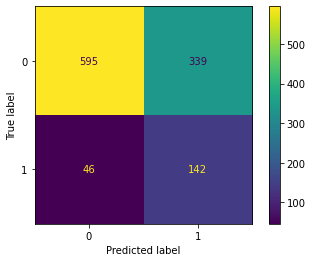

In [138]:
# menampilkan hasil prediksi data test dengan confusion matrix

cm = confusion_matrix(y_test, y_test_pred_nb, labels=abc_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=abc_model.classes_)

disp.plot()
plt.show()

### 5.6.4 Model Evaluation

In [139]:
# menampilkan metric evaluasi

y_prob_train_abc = abc_model.predict_proba(X_train_final)[:,1]
y_prob_test_abc = abc_model.predict_proba(X_test_final)[:,1]

print('Decision Tree evaluation matric:')
print('\n')
print("="*10,"TRAINING","="*10)
print(classification_report(y_train, y_train_pred_abc, zero_division=0))
print('ROC-AUC Score Train:',roc_auc_score(y_train, y_prob_train_abc))
print("\n")
print("="*10,"TEST","="*10)
print(classification_report(y_test, y_test_pred_abc, zero_division=0))
print('ROC-AUC Score Test:',roc_auc_score(y_test, y_prob_test_abc))

Decision Tree evaluation matric:


========== TRAINING ==========
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1240
           1       0.81      0.80      0.81       754

    accuracy                           0.85      1994
   macro avg       0.85      0.84      0.84      1994
weighted avg       0.85      0.85      0.85      1994

ROC-AUC Score Train: 0.93178852571233


========== TEST ==========
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       934
           1       0.60      0.73      0.66       188

    accuracy                           0.87      1122
   macro avg       0.77      0.82      0.79      1122
weighted avg       0.89      0.87      0.88      1122

ROC-AUC Score Test: 0.9060207754339604


## 5.8 Random Forest with pipeline

In [140]:
pipe_rf = Pipeline(
    steps=[("full_pipeline", full_pipeline), ("classifier", RandomForestClassifier(n_estimators=500, max_leaf_nodes=120, random_state=114))]
)


pipe_rf.fit(X_train, y_train)
print("model score: %.3f" % pipe_rf.score(X_train, y_train))
print("model score: %.3f" % pipe_rf.score(X_test, y_test))

pipe_rf

model score: 0.943
model score: 0.920


Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('sensoring',
                                                                   Winsorizer(tail='both')),
                                                                  ('std_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tenure', 'CityTier',
                                                   'HourSpendOnApp',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'OrderAmountHikeFromlastYear',
                                                   'OrderCount',
                                                   'DaySinceLastOrder',
                                                   'CashbackAmount']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer2',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('std_scaler',
                                                                   OneHotEncoder())]),
                                                  ['PreferredPaymentMode',
                                                   'Gender', 'PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('classifier',
                 RandomForestClassifier(max_leaf_nodes=120, n_estimators=500,
                                        random_state=114))])

# 6. Comparing Models

## 6.1 Cross-Validation masing-masing model

In [141]:
skfold=StratifiedKFold(n_splits=10)

# from logistic regression
log_acc_scores=cross_val_score(log_model,X_train_final, y_train,cv=skfold,scoring="accuracy")
log_rcl_scores=cross_val_score(log_model,X_train_final, y_train,cv=skfold,scoring="recall")
log_prcs_scores=cross_val_score(log_model,X_train_final, y_train,cv=skfold,scoring="precision")
log_f1_scores=cross_val_score(log_model,X_train_final, y_train,cv=skfold,scoring="f1")
log_roau_scores=cross_val_score(log_model,X_train_final, y_train,cv=skfold,scoring="roc_auc")

# from svm
svm_acc_scores=cross_val_score(svm_model,X_train_final, y_train,cv=skfold,scoring="accuracy")
svm_rcl_scores=cross_val_score(svm_model,X_train_final, y_train,cv=skfold,scoring="recall")
svm_prcs_scores=cross_val_score(svm_model,X_train_final, y_train,cv=skfold,scoring="precision")
svm_f1_scores=cross_val_score(svm_model,X_train_final, y_train,cv=skfold,scoring="f1")
svm_roau_scores=cross_val_score(svm_model,X_train_final, y_train,cv=skfold,scoring="roc_auc")

# from decision trees
dtc_acc_scores=cross_val_score(dtc_model,X_train_final, y_train,cv=skfold,scoring="accuracy")
dtc_rcl_scores=cross_val_score(dtc_model,X_train_final, y_train,cv=skfold,scoring="recall")
dtc_prcs_scores=cross_val_score(dtc_model,X_train_final, y_train,cv=skfold,scoring="precision")
dtc_f1_scores=cross_val_score(dtc_model,X_train_final, y_train,cv=skfold,scoring="f1")
dtc_roau_scores=cross_val_score(dtc_model,X_train_final, y_train,cv=skfold,scoring="roc_auc")

# from random forest
rf_acc_scores=cross_val_score(rf_model,X_train_final, y_train,cv=skfold,scoring="accuracy")
rf_rcl_scores=cross_val_score(rf_model,X_train_final, y_train,cv=skfold,scoring="recall")
rf_prcs_scores=cross_val_score(rf_model,X_train_final, y_train,cv=skfold,scoring="precision")
rf_f1_scores=cross_val_score(rf_model,X_train_final, y_train,cv=skfold,scoring="f1")
rf_roau_scores=cross_val_score(rf_model,X_train_final, y_train,cv=skfold,scoring="roc_auc")

# from KNN
knn_acc_scores=cross_val_score(knn_model,X_train_final, y_train,cv=skfold,scoring="accuracy")
knn_rcl_scores=cross_val_score(knn_model,X_train_final, y_train,cv=skfold,scoring="recall")
knn_prcs_scores=cross_val_score(knn_model,X_train_final, y_train,cv=skfold,scoring="precision")
knn_f1_scores=cross_val_score(knn_model,X_train_final, y_train,cv=skfold,scoring="f1")
knn_roau_scores=cross_val_score(knn_model,X_train_final, y_train,cv=skfold,scoring="roc_auc")

# from Naive Bayes
nb_acc_scores=cross_val_score(nb_model,X_train_final, y_train,cv=skfold,scoring="accuracy")
nb_rcl_scores=cross_val_score(nb_model,X_train_final, y_train,cv=skfold,scoring="recall")
nb_prcs_scores=cross_val_score(nb_model,X_train_final, y_train,cv=skfold,scoring="precision")
nb_f1_scores=cross_val_score(nb_model,X_train_final, y_train,cv=skfold,scoring="f1")
nb_roau_scores=cross_val_score(nb_model,X_train_final, y_train,cv=skfold,scoring="roc_auc")

# from AdaBosst
abc_acc_scores=cross_val_score(abc_model,X_train_final, y_train,cv=skfold,scoring="accuracy")
abc_rcl_scores=cross_val_score(abc_model,X_train_final, y_train,cv=skfold,scoring="recall")
abc_prcs_scores=cross_val_score(abc_model,X_train_final, y_train,cv=skfold,scoring="precision")
abc_f1_scores=cross_val_score(abc_model,X_train_final, y_train,cv=skfold,scoring="f1")
abc_roau_scores=cross_val_score(abc_model,X_train_final, y_train,cv=skfold,scoring="roc_auc")

## 6.2 Rata-rata dan Standar Deviasi dari hasil cross-validaton masing-masing model

In [142]:
# mendefinisikan rumus mencari rata-rata
def findMean(a, n):
 
    sum = 0
    for i in range(0, n):
        sum += a[i]
 
    return float(sum/n)

n = len(log_acc_scores)

In [143]:
# Memberikan informasi rata-rata dan standar deviasi dari hasil cross validation bagian pertama
print('Rata-rata hasil cross validation, part 1')
print('\n')
print('1. Logistic Regression')
print("1.1 Accuracy  ="," mean=",findMean(log_acc_scores, n)," std=",np.std(log_acc_scores))
print("1.2 Recall    =", " mean=",findMean(log_rcl_scores, n)," std=",np.std(log_rcl_scores))
print("1.3 Precision =", " mean=", findMean(log_prcs_scores, n)," std=",np.std(log_prcs_scores))
print("1.4 F1        =", " mean=", findMean(log_f1_scores, n)," std=", np.std(log_f1_scores))
print("1.5 ROC-AUC   =", " mean=", findMean(log_roau_scores, n)," std=", np.std(log_roau_scores))
print('\n')
print('2. SVM')
print("2.1 Accuracy  =", " mean=", findMean(svm_acc_scores, n)," std=", np.std(svm_acc_scores))
print("2.2 Recall    =", " mean=", findMean(svm_rcl_scores, n)," std=", np.std(svm_rcl_scores))
print("2.3 Precision =", " mean=", findMean(svm_prcs_scores, n)," std=", np.std(svm_prcs_scores))
print("2.4 F1        =", " mean=", findMean(svm_f1_scores, n)," std=", np.std(svm_f1_scores))
print("2.5 ROC-AUC   =", " mean=", findMean(svm_roau_scores, n)," std=", np.std(svm_roau_scores))
print('\n')
print('3. Decision Trees')
print("3.1 Accuracy  =", " mean=", findMean(dtc_acc_scores, n)," std=", np.std(dtc_acc_scores))
print("3.2 Recall    =", " mean=", findMean(dtc_rcl_scores, n)," std=", np.std(dtc_rcl_scores))
print("3.3 Precision =", " mean=", findMean(dtc_prcs_scores, n)," std=", np.std(dtc_prcs_scores))
print("3.4 F1        =", " mean=", findMean(dtc_f1_scores, n)," std=", np.std(dtc_f1_scores))
print("3.5 ROC-AUC   =", " mean=", findMean(dtc_roau_scores, n)," std=", np.std(dtc_roau_scores))

Rata-rata hasil cross validation, part 1


1. Logistic Regression
1.1 Accuracy  =  mean= 0.8099396984924624  std= 0.03090851222358589
1.2 Recall    =  mean= 0.7108245614035088  std= 0.05337988792228081
1.3 Precision =  mean= 0.7698903316980928  std= 0.0445390462086845
1.4 F1        =  mean= 0.7384039312184105  std= 0.043295578669404
1.5 ROC-AUC   =  mean= 0.8799144029428408  std= 0.018153473477570774


2. SVM
2.1 Accuracy  =  mean= 0.8194522613065326  std= 0.02575106444925511
2.2 Recall    =  mean= 0.6922456140350878  std= 0.05397723036015308
2.3 Precision =  mean= 0.8055241350678116  std= 0.04438298673064706
2.4 F1        =  mean= 0.742982721811846  std= 0.037836721611128145
2.5 ROC-AUC   =  mean= 0.8896448783248443  std= 0.0157911049238201


3. Decision Trees
3.1 Accuracy  =  mean= 0.890673366834171  std= 0.019392970918022005
3.2 Recall    =  mean= 0.8885263157894736  std= 0.033300186658897134
3.3 Precision =  mean= 0.832974156544636  std= 0.025861386643387965
3.4 F1        =  mean= 

In [144]:
# Memberikan informasi rata-rata  dan standar deviasi dari hasil cross validation bagian kedua

print('4. Random Forest')
print("4.1 Accuracy  =", " mean=", findMean(rf_acc_scores, n)," std=", np.std(rf_acc_scores))
print("4.2 Recall    =", " mean=", findMean(rf_rcl_scores, n)," std=", np.std(rf_rcl_scores))
print("4.3 Precision =", " mean=", findMean(rf_prcs_scores, n)," std=", np.std(rf_prcs_scores))
print("4.4 F1        =", " mean=", findMean(rf_f1_scores, n)," std=", np.std(rf_f1_scores))
print("4.5 ROC-AUC   =", " mean=", findMean(rf_roau_scores, n)," std=", np.std(rf_roau_scores))
print('\n')
print('5. KNN')
print("5.1 Accuracy  =", " mean=", findMean(knn_acc_scores, n)," std=", np.std(knn_acc_scores))
print("5.2 Recall    =", " mean=", findMean(knn_rcl_scores, n)," std=", np.std(knn_rcl_scores))
print("5.3 Precision =", " mean=", findMean(knn_prcs_scores, n)," std=", np.std(knn_prcs_scores))
print("5.4 F1        =", " mean=", findMean(knn_f1_scores, n)," std=", np.std(knn_f1_scores))
print("5.5 ROC-AUC   =", " mean=", findMean(knn_roau_scores, n)," std=", np.std(knn_roau_scores))

4. Random Forest
4.1 Accuracy  =  mean= 0.916751256281407  std= 0.018116236684680476
4.2 Recall    =  mean= 0.8938947368421053  std= 0.018844065368987015
4.3 Precision =  mean= 0.8883730960488281  std= 0.02685297099170765
4.4 F1        =  mean= 0.8953245085073227  std= 0.019704802924684024
4.5 ROC-AUC   =  mean= 0.969034168081494  std= 0.007296266474700433


5. KNN
5.1 Accuracy  =  mean= 0.7397110552763818  std= 0.028431213692391395
5.2 Recall    =  mean= 0.6405438596491229  std= 0.05310955187013073
5.3 Precision =  mean= 0.6606139056131803  std= 0.037618971186360664
5.4 F1        =  mean= 0.6498615375115897  std= 0.04258151727036636
5.5 ROC-AUC   =  mean= 0.8159728353140917  std= 0.03446388536148625


In [145]:
# Memberikan informasi rata-rata dan standar deviasi dari hasil cross validation bagian ketiga
print('Rata-rata hasil cross validation, part 3')
print('\n')
print('6. Naive Bayes')
print("6.1 Accuracy  =", " mean=",findMean(nb_acc_scores, n)," std=",np.std(nb_acc_scores))
print("6.2 Recall    =", " mean=",findMean(nb_rcl_scores, n)," std=",np.std(nb_rcl_scores))
print("6.3 Precision =", " mean=", findMean(nb_prcs_scores, n)," std=",np.std(nb_prcs_scores))
print("6.4 F1        =", " mean=", findMean(nb_f1_scores, n)," std=", np.std(nb_f1_scores))
print("6.5 ROC-AUC   =", " mean=", findMean(nb_roau_scores, n)," std=", np.std(nb_roau_scores))
print('\n')
print('7. AdaBoost')
print("7.1 Accuracy  =", " mean=", findMean(abc_acc_scores, n)," std=", np.std(abc_acc_scores))
print("7.2 Recall    =", " mean=", findMean(abc_rcl_scores, n)," std=", np.std(abc_rcl_scores))
print("7.3 Precision =", " mean=", findMean(abc_prcs_scores, n)," std=", np.std(abc_prcs_scores))
print("7.4 F1        =", " mean=", findMean(abc_f1_scores, n)," std=", np.std(abc_f1_scores))
print("7.5 ROC-AUC   =", " mean=", findMean(abc_roau_scores, n)," std=", np.std(abc_roau_scores))

Rata-rata hasil cross validation, part 3


6. Naive Bayes
6.1 Accuracy  =  mean= 0.6910678391959799  std= 0.02939669554897731
6.2 Recall    =  mean= 0.7903508771929826  std= 0.04683474546294937
6.3 Precision =  mean= 0.5656290212664844  std= 0.02810016977614227
6.4 F1        =  mean= 0.659099815697739  std= 0.03303920974116523
6.5 ROC-AUC   =  mean= 0.7839811827956988  std= 0.015210619703612286


7. AdaBoost
7.1 Accuracy  =  mean= 0.8385100502512562  std= 0.023224891870227898
7.2 Recall    =  mean= 0.7757719298245614  std= 0.054290093767807496
7.3 Precision =  mean= 0.7921575771794159  std= 0.02103344281630015
7.4 F1        =  mean= 0.7833185774662634  std= 0.03614929627050027
7.5 ROC-AUC   =  mean= 0.9113123938879457  std= 0.020768623961694262


## 6.3 Kesimpulan dari perbandingan model

Saya memilih model Random Forest, karena mempunyai penilaian score paling tinggi dan juga dari confusion matrix mempunyai false negatif yang sedikit (Lebih baik terdeteksi churn namun tidak, daripada terdeteksi tidak churn tetapi malah churn)

# 7. Model improvement

## 7.1 Hyperparameter Tuning (Logistic Regression)

In [146]:
params = {'penalty':['none','l2','l1','elasticnet'],
'solver':['newton-cg','lbfgs','liblinear','sag','saga'],
'multi_class':['auto','ovr','multinomial']}

grid_log_rec = GridSearchCV(estimator=LogisticRegression(), param_grid=params, cv=10, verbose=2,scoring='recall')

In [147]:
grid_log_rec.fit(X_train_final, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
[CV] END ...multi_class=auto, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...multi_class=auto, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...multi_class=auto, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END ...multi_class=auto, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...multi_class=auto, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...multi_class=auto, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...multi_class=auto, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...multi_class=auto, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...multi_class=auto, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...multi_class=auto, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......multi_class=auto, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......multi_class=auto, penalty=none

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ........multi_class=auto, penalty=none, solver=saga; total time=   0.0s
[CV] END ........multi_class=auto, penalty=none, solver=saga; total time=   0.0s
[CV] END ........multi_class=auto, penalty=none, solver=saga; total time=   0.0s
[CV] END ........multi_class=auto, penalty=none, solver=saga; total time=   0.0s
[CV] END ........multi_class=auto, penalty=none, solver=saga; total time=   0.0s
[CV] END ........multi_class=auto, penalty=none, solver=saga; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....multi_class=auto, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....multi_class=au

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .........multi_class=ovr, penalty=none, solver=saga; total time=   0.0s
[CV] END .........multi_class=ovr, penalty=none, solver=saga; total time=   0.0s
[CV] END .........multi_class=ovr, penalty=none, solver=saga; total time=   0.0s
[CV] END .........multi_class=ovr, penalty=none, solver=saga; total time=   0.0s
[CV] END .........multi_class=ovr, penalty=none, solver=saga; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......multi_class=ovr, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......multi_class=o

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..multi_class=multinomial, penalty=none, solver=sag; total time=   0.0s
[CV] END ..multi_class=multinomial, penalty=none, solver=sag; total time=   0.1s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..multi_class=multinomial, penalty=none, solver=sag; total time=   0.0s
[CV] END ..multi_class=multinomial, penalty=none, solver=sag; total time=   0.0s
[CV] END ..multi_class=multinomial, penalty=none, solver=sag; total time=   0.1s
[CV] END ..multi_class=multinomial, penalty=none, solver=sag; total time=   0.1s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..multi_class=multinomial, penalty=none, solver=sag; total time=   0.0s
[CV] END ..multi_class=multinomial, penalty=none, solver=sag; total time=   0.0s


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END ..multi_class=multinomial, penalty=none, solver=sag; total time=   0.0s
[CV] END .multi_class=multinomial, penalty=none, solver=saga; total time=   0.0s
[CV] END .multi_class=multinomial, penalty=none, solver=saga; total time=   0.0s
[CV] END .multi_class=multinomial, penalty=none, solver=saga; total time=   0.0s
[CV] END .multi_class=multinomial, penalty=none, solver=saga; total time=   0.0s
[CV] END .multi_class=multinomial, penalty=none, solver=saga; total time=   0.0s
[CV] END .multi_class=multinomial, penalty=none, solver=saga; total time=   0.0s
[CV] END .multi_class=multinomial, penalty=none, solver=saga; total time=   0.0s
[CV] END .multi_class=multinomial, penalty=none, solver=saga; total time=   0.0s
[CV] END .multi_class=multinomial, penalty=none, solver=saga; total time=   0.0s
[CV] END .multi_class=multinomial, penalty=none, solver=saga; total time=   0.0s
[CV] END multi_class=multinomial, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END multi_class=multi

c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
290 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 78, in _check_solver
    raise ValueError("penalty

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['none', 'l2', 'l1', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall', verbose=2)

In [148]:
grid_log_rec.best_params_

{'multi_class': 'auto', 'penalty': 'none', 'solver': 'newton-cg'}

In [149]:
grid_log_rec.best_score_

0.7372982456140351

## 7.2 Hyperparameter Tuning (Random Forest)

In [150]:
# Mendefinisikan model improvement untuk Random Forest
params = {'criterion':['gini','entropy','log_loss'],
'max_depth':[100,230,250,300],
'max_features':['sqrt','log2','None'],
'min_samples_split':[3,6,8],
'random_state':[114]
}

grid_rf_acc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=params, cv=10, verbose=2,scoring='recall')

In [151]:
# Memulai pencarian parameter terbaik untuk menemukan akurasi tertinggi
grid_rf_acc.fit(X_train_final, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.4s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.3s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.3s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.3s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.3s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.3s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.3s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.3s

c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\User\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\User\anaconda3\lib\site-packages\job

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [100, 230, 250, 300],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'min_samples_split': [3, 6, 8],
                         'random_state': [114]},
             scoring='recall', verbose=2)

In [152]:
# Memperlihatkan parameter Random Forest yang terbaik
grid_rf_acc.best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'random_state': 114}

In [153]:
# Memperlihatkan hasil akurasi terbaik dari model improvement (Random Forest)
grid_rf_acc.best_score_

0.893859649122807

## 7.3 Hyperparameter Tuning (Random Forest with Pipeline)

In [154]:
params_pipe = {'criterion':['gini','entropy','log_loss'],
'max_depth':[100,230,250,300],
'max_features':['sqrt','log2','None'],
'min_samples_split':[3,6,8],
'random_state':[114]
}

pipe_hp_rf = Pipeline(
    steps=[("full_pipeline", full_pipeline), ("classifier", GridSearchCV(estimator=RandomForestClassifier(), param_grid=params_pipe, cv=10, verbose=2,scoring='recall'))]
)


pipe_hp_rf.fit(X_train, y_train)
print("model score: %.3f" % pipe_hp_rf.score(X_train, y_train))
print("model score: %.3f" % pipe_hp_rf.score(X_test, y_test))

pipe_hp_rf

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.4s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.3s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.3s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.4s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.3s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.3s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.3s
[CV] END criterion=gini, max_depth=100, max_features=sqrt, min_samples_split=3, random_state=114; total time=   0.4s

c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
360 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 476, in fit
    trees = Parallel(
  File "c:\Users\User\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\User\anaconda3\lib\site-packages\job

model score: 1.000
model score: 0.904


Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer1',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('sensoring',
                                                                   Winsorizer(tail='both')),
                                                                  ('std_scaler',
                                                                   MinMaxScaler())]),
                                                  ['Tenure', 'CityTier',
                                                   'HourSpendOnApp',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'Complain',
                                                   'OrderAmountHikeFromlastYear',
                                                   'O...
                                                                   OneHotEncoder())]),
                                                  ['PreferredPaymentMode',
                                                   'Gender', 'PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('classifier',
                 GridSearchCV(cv=10, estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy',
                                                        'log_loss'],
                                          'max_depth': [100, 230, 250, 300],
                                          'max_features': ['sqrt', 'log2',
                                                           'None'],
                                          'min_samples_split': [3, 6, 8],
                                          'random_state': [114]},
                              scoring='recall', verbose=2))])

In [155]:
# Memperlihatkan parameter Random Forest yang terbaik
pipe_hp_rf.named_steps['classifier'].best_params_

{'criterion': 'entropy',
 'max_depth': 100,
 'max_features': 'sqrt',
 'min_samples_split': 3,
 'random_state': 114}

In [156]:
# Memperlihatkan hasil akurasi terbaik dari model improvement (Random Forest)
pipe_hp_rf.named_steps['classifier'].best_score_

0.8753157894736843

Lebih bagus Random Forest yang tanpa pipeline

## 7.3 Kesimpulan setelah Hyperparameter Tuning

Hyperparameter Tuning pada Random Forest mempunyai nilai recall yang bagus (0.8939), namun beda tipis dengan recall dari Random Forest tanpa Hyperparameter Tuning (0.8965) 

Random Forest Hyperparameter Tuning dengan pipeline juga beda jauh daripada model Random Forest yang lain (0.8753) 

# 8. Model Inference

## 8.1 Menyiapkan data inference

In [157]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        20 non-null     int64  
 1   Tenure                       20 non-null     float64
 2   PreferredLoginDevice         20 non-null     object 
 3   CityTier                     20 non-null     int64  
 4   WarehouseToHome              20 non-null     float64
 5   PreferredPaymentMode         20 non-null     object 
 6   Gender                       20 non-null     object 
 7   HourSpendOnApp               20 non-null     float64
 8   NumberOfDeviceRegistered     20 non-null     int64  
 9   PreferedOrderCat             20 non-null     object 
 10  SatisfactionScore            20 non-null     int64  
 11  MaritalStatus                20 non-null     object 
 12  NumberOfAddress              20 non-null     int64  
 13  Complain              

In [158]:
# memisahkan kolom numerik dengan kolom kategorikal

df_inf_num = df_inf[num_columns]
df_inf_cat = df_inf[cat_columns]

In [159]:
# melakukan scaling untuk kolom numerikal

df_inf_num_scld = scaler.transform(df_inf_num)
df_inf_num_scld

array([[0.1147541 , 0.        , 0.25806452, 0.33333333, 0.6       ,
        0.25      , 0.22222222, 0.        , 0.86666667, 0.26666667,
        0.17391304, 0.62345679],
       [0.19672131, 0.        , 0.35483871, 0.33333333, 0.4       ,
        1.        , 0.05555556, 1.        , 0.2       , 0.66666667,
        0.2173913 , 0.83641975],
       [0.14754098, 0.        , 0.12903226, 1.        , 0.8       ,
        0.        , 0.05555556, 1.        , 0.26666667, 0.06666667,
        0.10869565, 0.53703704],
       [0.27868852, 0.        , 0.12903226, 0.33333333, 0.4       ,
        0.        , 0.22222222, 1.        , 0.26666667, 0.        ,
        0.02173913, 0.91049383],
       [0.09836066, 0.        , 0.29032258, 0.33333333, 0.6       ,
        0.75      , 0.33333333, 0.        , 0.66666667, 0.        ,
        0.02173913, 0.38888889],
       [0.21311475, 0.        , 0.29032258, 0.33333333, 0.6       ,
        0.        , 0.        , 1.        , 0.6       , 0.06666667,
        0.06521739,

In [160]:
# melakukan encoding untuk kolom kategorikal

df_inf_cat_enc = encoder.transform(df_inf_cat).toarray()
df_inf_cat_enc

array([[0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
        0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
        0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
        0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0.,
        1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
        0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1.,
        0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
        0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        1., 0.],
       [0., 0., 0., 0

In [161]:
# menggabungkan kolom numerikal yang sudah di-scaled dan kolom kategorikal yang sudah di-encoded

df_inf_final = np.concatenate([df_inf_num_scld, df_inf_cat_enc], axis=1)
df_inf_final

array([[0.1147541 , 0.        , 0.25806452, 0.33333333, 0.6       ,
        0.25      , 0.22222222, 0.        , 0.86666667, 0.26666667,
        0.17391304, 0.62345679, 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ],
       [0.19672131, 0.        , 0.35483871, 0.33333333, 0.4       ,
        1.        , 0.05555556, 1.        , 0.2       , 0.66666667,
        0.2173913 , 0.83641975, 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ],
       [0.14754098, 0.        , 0.12903226, 1.        , 0.8       ,
        0.        , 0.05555556, 1.        , 0.26666667, 0.06666667,
        0.10869565, 0.53703704, 0.        , 0.

## 8.2 Klasifikasi data inferensial memakai Random Forest

In [162]:
# melakukan prediksi terhadap data inference dengan model rf

y_pred_inf_rf = rf_model.predict(df_inf_final)
y_pred_inf_rf_df = pd.DataFrame(y_pred_inf_rf, columns=['Churn (Random Forest)'])
y_pred_inf_rf_df

,Churn (Random Forest)
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,0


In [163]:
pd.concat([df_inf, y_pred_inf_rf_df], axis=1)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn (Random Forest)
0,0,7.0,Computer,1,13.0,Debit Card,Male,2.0,4,Laptop & Accessory,2,Married,5,0,24.0,5.0,5.0,8.0,202,0
1,0,12.0,Mobile Phone,1,16.0,Credit Card,Male,2.0,3,Grocery,5,Divorced,2,1,14.0,1.0,11.0,10.0,271,0
2,0,9.0,Computer,1,9.0,Credit Card,Male,4.0,5,Mobile Phone,1,Single,2,1,15.0,2.0,2.0,5.0,174,0
3,0,17.0,Mobile Phone,1,9.0,UPI,Male,2.0,3,Others,1,Married,5,1,15.0,0.0,1.0,1.0,295,0
4,0,6.0,Phone,1,14.0,CC,Female,2.0,4,Mobile,4,Divorced,7,0,21.0,0.0,1.0,1.0,126,0
5,0,13.0,Phone,1,14.0,CC,Female,2.0,4,Mobile,1,Single,1,1,20.0,0.0,2.0,3.0,123,0
6,0,4.0,Mobile Phone,2,16.0,UPI,Male,3.0,4,Laptop & Accessory,1,Married,2,1,20.0,5.0,5.0,8.0,188,0
7,1,1.0,Mobile Phone,3,11.0,Cash on Delivery,Male,3.0,4,Fashion,5,Single,2,1,23.0,3.0,5.0,3.0,221,1
8,1,1.0,Mobile Phone,1,10.0,Credit Card,Male,4.0,4,Mobile Phone,5,Divorced,7,0,14.0,2.0,2.0,3.0,165,1
9,0,3.0,Computer,1,7.0,COD,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,14.0,1.0,2.0,10.0,168,0


## 8.3 Klasifikasi data inferensial memakai Random Forest dengan Pipeline

In [164]:
y_pred_pipe_rf = pipe_rf.predict(df_inf)
y_pred_pipe_rf_df = pd.DataFrame(y_pred_pipe_rf, columns=['Churn (Random Forest)'])
y_pred_pipe_rf_df

,Churn (Random Forest)
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,0


In [165]:
pd.concat([df_inf, y_pred_pipe_rf_df], axis=1)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,Churn (Random Forest)
0,0,7.0,Computer,1,13.0,Debit Card,Male,2.0,4,Laptop & Accessory,2,Married,5,0,24.0,5.0,5.0,8.0,202,0
1,0,12.0,Mobile Phone,1,16.0,Credit Card,Male,2.0,3,Grocery,5,Divorced,2,1,14.0,1.0,11.0,10.0,271,0
2,0,9.0,Computer,1,9.0,Credit Card,Male,4.0,5,Mobile Phone,1,Single,2,1,15.0,2.0,2.0,5.0,174,0
3,0,17.0,Mobile Phone,1,9.0,UPI,Male,2.0,3,Others,1,Married,5,1,15.0,0.0,1.0,1.0,295,0
4,0,6.0,Phone,1,14.0,CC,Female,2.0,4,Mobile,4,Divorced,7,0,21.0,0.0,1.0,1.0,126,0
5,0,13.0,Phone,1,14.0,CC,Female,2.0,4,Mobile,1,Single,1,1,20.0,0.0,2.0,3.0,123,0
6,0,4.0,Mobile Phone,2,16.0,UPI,Male,3.0,4,Laptop & Accessory,1,Married,2,1,20.0,5.0,5.0,8.0,188,0
7,1,1.0,Mobile Phone,3,11.0,Cash on Delivery,Male,3.0,4,Fashion,5,Single,2,1,23.0,3.0,5.0,3.0,221,1
8,1,1.0,Mobile Phone,1,10.0,Credit Card,Male,4.0,4,Mobile Phone,5,Divorced,7,0,14.0,2.0,2.0,3.0,165,1
9,0,3.0,Computer,1,7.0,COD,Male,3.0,4,Laptop & Accessory,3,Divorced,3,0,14.0,1.0,2.0,10.0,168,0


# 9. Kesimpulan

Hasil predikisi mengenai pemberhentian pelayanan perusahaan e-commerce sudah berhasil. Algoritma dengan Random Forest menghasilkan recall yang bagus untuk dijadikan algoritma yang menangani data inferensial. Beberapa saran saya mengenai dataset ini:

- Terdapat missing value yang acak, sehingga tidak bisa dicari penyebabnya. Sehingga solusinya adalah membuat sistem dimana pencatatan missing value diubah menjadi berbagai sebab tergantung dari kolomnya atau kondisi-kondisi tertentu, sehingga lebih mudah terselidiki jika ada missing value.

-  Bisa dilakukan analisis lagi dengan hyperparameter tuning yang mempunyai parameter yang lebih banyak.

- Bisa dilakukan analisis lagi dengan penanganan data imbalance yang berbeda.